In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
#rom sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LassoLars

from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
def get_ranks(good_df,ypred):
    cutoff=0.2
    #print (codedata,ypred,ydata)
    #print (len(ypred),len(good_df.mm.to_list()))
    d = {'code':good_df.code.to_list(),'pred':ypred,
         "dockQ":good_df.dockQ.to_list(),"params":good_df.params.to_list(),
        "mm":good_df.mm.to_list()}
    res_df=pd.DataFrame(d).sort_values("pred")
    #res_df.sort_values("CODE")

    i=0
    sumdiff=0
    mmdiff=0
    correct=0
    for code in res_df.code.unique():
        topranked=res_df.loc[res_df.code==code].sort_values("pred")["dockQ"][-1:].max()
        best=res_df.loc[res_df.code==code]["dockQ"].max()
        mmtop=res_df.loc[res_df.code==code].sort_values("pred")["mm"][-1:].max()
        mmbest=res_df.loc[res_df.code==code]["mm"].max()
        #print (code,topranked,best)
        if best>cutoff:
            i+=1
            sumdiff+=best-topranked
            mmdiff+=mmbest-mmtop
            if topranked>cutoff:
                correct+=1
    #print (i,correct,round(sumdiff/i,3))            
    return (i,correct,sumdiff,mmdiff)

In [4]:
reg = LinearRegression()
#reg=RandomForestClassifier(n_estimators=10)
#reg=LassoLars(alpha=.1)
#reg = TweedieRegressor(power=1, alpha=0.5, link='log')
#reg=TheilSenRegressor(random_state=42)
#reg=RANSACRegressor(random_state=42)
#reg=HuberRegressor()

In [5]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")
df=df.dropna()
#df.JHparams.unique()

In [6]:
sns.set(style="whitegrid")

In [7]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'hhprob', 'hhevalue', 'hhscore',
       'rank'],
      dtype='object')

In [8]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [9]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"


In [10]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
#df.JHparams.unique()


name      JHparams  lenA  lenB     msa      msaA  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8    97    90  1060.0    1485.0   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8    90    97  1060.0    2034.0   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8   109    90   733.0    1484.0   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8    90   109   733.0    2034.0   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8   129   118  5651.0  349880.0   
...                    ...           ...   ...   ...     ...       ...   
24456  4y5o_u1_A-4y5o_u2_A     trRosetta    94    85    34.0    3100.0   
24457  4zfr_u1_A-4zfr_u2_A     trRosetta   186    77    12.0    9290.0   
24458  5brr_u1_A-5brr_u2_A     trRosetta   378   266   107.0   13553.0   
24459  5cec_u1_A-5cec_u2_A     trRosetta   403   191     7.0   30621.0   
24460  5eg3_u1_A-5eg3_u2_A     trRosetta   303   105     7.0  565997.0   

           msaB  cdhit  dockQ   fnat  ...   auc   evalue   seqid  hhprob  \
0        2034.0   1026  0.281  0.167  ...  0.40  9999.00   0.000     0.4   
1        1485.0    989  0.239  0.250  ...  0.36  9999.00   0.000     0.0   
2        2034.0    654  0.223  0.120  ...  0.46     4.30  50.000     1.8   
3        1484.0    656  0.229  0.160  ...  0.46     4.30  50.000     2.5   
4       23051.0   5071  0.000  0.000  ...  0.00  9999.00   0.000     0.0   
...         ...    ...    ...    ...  ...   ...      ...     ...     ...   
24456    1781.0     11  0.055  0.000  ...  0.00  9999.00   0.000     7.2   
24457   38386.0     12  0.048  0.000  ...  0.09  9999.00   0.000     0.0   
24458   45450.0     79  0.009  0.000  ...  0.00     0.48  53.846     0.5   
24459  309307.0      7  0.011  0.000  ...  0.00    19.00  33.333     0.3   
24460   25926.0      5  0.003  0.000  ...  0.00    68.00  40.000     0.7   

       hhevalue  hhscore  rank  code  CODE        params  
0         0.400      0.4     1  1ay7  1ay7  -N 3 --cpu 8  
1      9999.000      0.0     2  1ay7  1ay7  -N 3 --cpu 8  
2         0.027     13.5     1  1b27  1b27  -N 3 --cpu 8  
3         0.019     13.7     2  1b27  1b27  -N 3 --cpu 8  
4      9999.000      0.0     1  1bdj  1bdj  -N 3 --cpu 8  
...         ...      ...   ...   ...   ...           ...  
24456     7.200      7.2     1  4y5o  4y5o     trRosetta  
24457  9999.000      0.0     1  4zfr  4zfr     trRosetta  
24458     0.500      0.5     1  5brr  5brr     trRosetta  
24459     0.300      0.3     1  5cec  5cec     trRosetta  
24460     0.700      0.7     1  5eg3  5eg3     trRosetta  

[24461 rows x 48 columns]

In [11]:
#df.loc[df.JHparams=="N1-N3-new"]

In [12]:
r=re.compile("^PDB|^pdb")
datasets=df.JHparams.unique()
pdbset=list(filter(r.match, datasets))
df2=df.loc[(df.JHparams.isin(pdbset))&(~df.JHparams.isin(["pdbconfold"]))].copy()
df2.JHparams="PDB"
df2.params="PDB"
df2

name JHparams  lenA  lenB  msa  msaA  msaB  cdhit  dockQ  \
8068  1ay7_u1_A-1ay7_u2_A      PDB    97    90  0.0   0.0   0.0      0  0.884   
8069  1ay7_u2_A-1ay7_u1_A      PDB    90    97  0.0   0.0   0.0      0  0.929   
8070  1b27_u1_A-1b27_u2_A      PDB   109    90  0.0   0.0   0.0      0  0.861   
8071  1b27_u2_A-1b27_u1_A      PDB    90   109  0.0   0.0   0.0      0  0.887   
8072  1bdj_u1_A-1bdj_u2_A      PDB   129   118  0.0   0.0   0.0      0  0.790   
...                   ...      ...   ...   ...  ...   ...   ...    ...    ...   
9614  4hcn_u1_A-4hcn_u2_A      PDB   250    77  0.0   0.0   0.0      0  0.119   
9615  4llo_u1_A-4llo_u2_A      PDB   147   115  0.0   0.0   0.0      0  0.081   
9616  4llo_u2_A-4llo_u1_A      PDB   115   147  0.0   0.0   0.0      0  0.099   
9617  5brr_u1_A-5brr_u2_A      PDB   378   266  0.0   0.0   0.0      0  0.002   
9618  5brr_u2_A-5brr_u1_A      PDB   266   378  0.0   0.0   0.0      0  0.031   

       fnat  ...   auc   evalue   seqid  hhprob  hhevalue  hhscore  rank  \
8068  0.722  ...  0.01  9999.00   0.000     0.4       0.4      0.4     1   
8069  0.833  ...  0.09  9999.00   0.000     0.0    9999.0      0.0     2   
8070  0.740  ...  0.01     4.30  50.000     1.8       1.8      1.8     1   
8071  0.780  ...  0.08     4.30  50.000     2.5       2.5      2.5     2   
8072  0.882  ...  0.00  9999.00   0.000     0.0    9999.0      0.0     1   
...     ...  ...   ...      ...     ...     ...       ...      ...   ...   
9614  0.111  ...  0.04    18.00  38.462     0.0    9999.0      0.0     1   
9615  0.040  ...  0.10    17.00  27.273     0.0    9999.0      0.0     1   
9616  0.200  ...  0.01    17.00  27.273     0.0    9999.0      0.0     2   
9617  0.000  ...  0.05     0.48  53.846     0.5       0.5      0.5     1   
9618  0.055  ...  0.02     0.54  53.846     0.0    9999.0      0.0     2   

      code  CODE  params  
8068  1ay7  1ay7     PDB  
8069  1ay7  1ay7     PDB  
8070  1b27  1b27     PDB  
8071  1b27  1b27     PDB  
8072  1bdj  1bdj     PDB  
...    ...   ...     ...  
9614  4hcn  4hcn     PDB  
9615  4llo  4llo     PDB  
9616  4llo  4llo     PDB  
9617  5brr  5brr     PDB  
9618  5brr  5brr     PDB  

[1551 rows x 48 columns]

In [13]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
#df.fillna(0)
#df.params.unique()

In [14]:
# Add a linear combination of trRosetta
r=re.compile(".*-N.*") # .*cpu.*
datasets=df.JHparams.unique()
JHsets=list(filter(r.match, datasets))



In [15]:
cutoff=0.1
goodmodels=df.loc[(df.dockQ>cutoff)&(df.JHparams.isin(JHsets))].code.unique()
good_df=df.loc[(df.code.isin(goodmodels))&(df.JHparams.isin(JHsets))] #.reset_index()
#df.dockQ.dtypes

Text(0.5, 1.0, 'CC 0.245 Good: 0.583 Loss: 0.144 , 0.218 Test: 12')

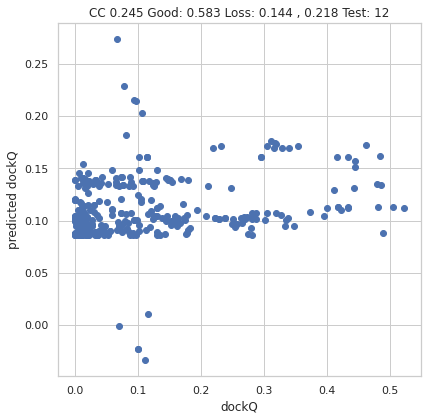

In [16]:
ydata=good_df.dockQ

#cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]
reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [17]:
xdata=df.loc[df.JHparams.isin(JHsets)][cols]
ypred = reg.predict(xdata)
df2=df.loc[df.JHparams.isin(JHsets)].reset_index()
df2.loc[:,'pred'] = ypred
topranked=pd.DataFrame(columns = df2.columns) 


In [18]:

for name in df2.name.unique():
    foo=df2.loc[df2.name==name].sort_values("pred")[-1:].max()
    #print(foo)
    foo_df=pd.DataFrame(foo).transpose()
    #print (foo_df)
    topranked=pd.concat([topranked,foo_df], ignore_index=True)
topranked["JHparams"]="JHranked"
topranked.params="JHranked"
topranked=topranked.drop(["pred","index"],axis=1)
topranked.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'hhprob', 'hhevalue', 'hhscore',
       'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [19]:
df.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'hhprob', 'hhevalue', 'hhscore',
       'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [20]:
df=pd.concat([df,topranked], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A',
       'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb',
       'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'],
      dtype=object)

In [21]:
df

name      JHparams lenA lenB   msa    msaA    msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8   90   97  1060    2034    1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8   90  109   733    2034    1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651  349880   23051   
...                    ...           ...  ...  ...   ...     ...     ...   
26453  5cec_u2_A-5cec_u1_A      JHranked  191  403     8   59695     200   
26454  5cra_u1_A-5cra_u2_A      JHranked  193   77     1      11   42026   
26455  5cra_u2_A-5cra_u1_A      JHranked   77  193     1   42026      11   
26456  5eg3_u1_A-5eg3_u2_A      JHranked  303  105   499  560629   26558   
26457  5eg3_u2_A-5eg3_u1_A      JHranked  105  303   305    3955  147816   

      cdhit  dockQ   fnat  ...   auc evalue   seqid hhprob hhevalue hhscore  \
0      1026  0.281  0.167  ...   0.4   9999       0    0.4      0.4     0.4   
1       989  0.239   0.25  ...  0.36   9999       0      0     9999       0   
2       654  0.223   0.12  ...  0.46    4.3      50    1.8    0.027    13.5   
3       656  0.229   0.16  ...  0.46    4.3      50    2.5    0.019    13.7   
4      5071      0      0  ...     0   9999       0      0     9999       0   
...     ...    ...    ...  ...   ...    ...     ...    ...      ...     ...   
26453     7   0.05  0.075  ...     0     19  33.333    0.3     0.21    14.5   
26454     1  0.008      0  ...     0   9999       0    1.3      1.3     1.3   
26455     1  0.103      0  ...  0.17   9999       0    1.1      1.1     1.1   
26456   278      0      0  ...     0     68      40      1        1       1   
26457   102  0.012      0  ...     0     68      40    0.4     0.13    12.9   

      rank  code  CODE        params  
0        1  1ay7  1ay7  -N 3 --cpu 8  
1        2  1ay7  1ay7  -N 3 --cpu 8  
2        1  1b27  1b27  -N 3 --cpu 8  
3        2  1b27  1b27  -N 3 --cpu 8  
4        1  1bdj  1bdj  -N 3 --cpu 8  
...    ...   ...   ...           ...  
26453    2  5cec  5cec      JHranked  
26454    1  5cra  5cra      JHranked  
26455    2  5cra  5cra      JHranked  
26456    1  5eg3  5eg3      JHranked  
26457    2  5eg3  5eg3      JHranked  

[26458 rows x 48 columns]

In [22]:
#df["rank"].str.isnumeric().unique()
#df.dtypes

In [23]:
# We need to check that everything is numeric
cols=['name', 'JHparams', 'seqid',      'rank']

#for d in df.columns.values.tolist():
for d in ["rank","len"]:
    if d=="name": continue
    if d=="JHparams": continue
    print (d)
    #print (df.loc[(df[d].str.isnumeric()!=True)][cols+[d]])
    #print (df.loc[(df[d].str.isnumeric()][d].unique()
    #print (df[d].str.isnumeric().unique())

rank
len


In [24]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [25]:
df.columns.values.tolist()

['name',
 'JHparams',
 'lenA',
 'lenB',
 'msa',
 'msaA',
 'msaB',
 'cdhit',
 'dockQ',
 'fnat',
 'iRMS',
 'LRMS',
 'fnonnat',
 'mm',
 'tmA',
 'tmB',
 'long',
 'med',
 'longPPV',
 'medPPV',
 'longA',
 'medA',
 'longPPVA',
 'medPPVA',
 'longB',
 'medB',
 'longPPVB',
 'medPPVB',
 'short',
 'shortPPV',
 'shortA',
 'shortPPVA',
 'shortB',
 'shortPPVB',
 'shortpdb',
 'medpdb',
 'longpdb',
 'avprob',
 'auc',
 'evalue',
 'seqid',
 'hhprob',
 'hhevalue',
 'hhscore',
 'rank',
 'code',
 'CODE',
 'params',
 'tmAB',
 'msaAB',
 'tmAB_max',
 'msaAB_max',
 'tmAB_min',
 'msaAB_min',
 'numcorrect',
 'len']

In [26]:
cols=['name', 'JHparams', 'seqid',      'rank']
      
d="TMdock-nohomology"
#df.loc[df.JHparams==d].groupby(["code"])[cols].first()

#df.loc[(df.JHparams==d) & ((df["rank"].str.isnumeric()!=True))][cols]
#df.loc[(df.JHparams==d)]["rank"].str.isnumeric()
#df.loc[(df.JHparams==d)] 
      
      

In [27]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    #print (d)
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


In [28]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

name   JHparams lenA lenB   msa    msaA    msaB cdhit  \
19144  1ay7_u1_A-1ay7_u2_A  trRosetta   97   90  1060    1485    2034  1026   
19146  1b27_u1_A-1b27_u2_A  trRosetta  109   90   733    1484    2034   654   
19148  1bdj_u1_A-1bdj_u2_A  trRosetta  129  118  5651  349880   23051  5071   
19150  1buh_u1_A-1buh_u2_A  trRosetta  291   72  1177  555226    1820   548   
19152  1bvn_u1_A-1bvn_u2_A  trRosetta  496   75    95   52623     123    85   
...                    ...        ...  ...  ...   ...     ...     ...   ...   
24456  4y5o_u1_A-4y5o_u2_A  trRosetta   94   85    34    3100    1781    11   
24457  4zfr_u1_A-4zfr_u2_A  trRosetta  186   77    12    9290   38386    12   
24458  5brr_u1_A-5brr_u2_A  trRosetta  378  266   107   13553   45450    79   
24459  5cec_u1_A-5cec_u2_A  trRosetta  403  191     7   30621  309307     7   
24460  5eg3_u1_A-5eg3_u2_A  trRosetta  303  105     7  565997   25926     5   

       dockQ   fnat  ...  CODE     params      tmAB     msaAB tmAB_max  \
19144  0.281  0.167  ...  1ay7  trRosetta  0.828190    1759.5  0.84625   
19146  0.223   0.12  ...  1b27  trRosetta  0.824750    1759.0  0.85428   
19148      0      0  ...  1bdj  trRosetta  0.861435  186465.5  0.92240   
19150      0      0  ...  1buh  trRosetta  0.560760  278523.0  0.73259   
19152  0.006      0  ...  1bvn  trRosetta  0.619740   26373.0  0.70905   
...      ...    ...  ...   ...        ...       ...       ...      ...   
24456  0.055      0  ...  4y5o  trRosetta  0.568465    2440.5  0.71099   
24457  0.048      0  ...  4zfr  trRosetta  0.505235   23838.0  0.64391   
24458  0.009      0  ...  5brr  trRosetta  0.332210   29501.5  0.38444   
24459  0.011      0  ...  5cec  trRosetta  0.508770  169964.0  0.70983   
24460  0.003      0  ...  5eg3  trRosetta  0.358330  295961.5  0.41599   

      msaAB_max tmAB_min msaAB_min numcorrect  len  
19144    2034.0  0.81013    1485.0     53.985  187  
19146    2034.0  0.79522    1484.0     49.025  199  
19148  349880.0  0.80047   23051.0          0  247  
19150  555226.0  0.38893    1820.0          0  363  
19152   52623.0  0.53043     123.0          0  571  
...         ...      ...       ...        ...  ...  
24456    3100.0  0.42594    1781.0          0  179  
24457   38386.0  0.36656    9290.0          3  263  
24458   45450.0  0.27998   13553.0        468  644  
24459  309307.0  0.30771   30621.0      2.006  594  
24460  565997.0  0.30067   25926.0          0  408  

[2881 rows x 56 columns]

In [29]:
df.JHparams.unique()
#datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A',
       'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb',
       'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'],
      dtype=object)

In [30]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[d]

name  JHparams lenA lenB   msa    msaA    msaB cdhit  \
26012  1ay7_u1_A-1ay7_u2_A  JHranked   97   90  1060    1485    2034   986   
26014  1b27_u1_A-1b27_u2_A  JHranked  109   90   733    1484    2034   654   
26016  1bdj_u1_A-1bdj_u2_A  JHranked  129  118  5651  349880   23051  5071   
26018  1buh_u1_A-1buh_u2_A  JHranked  291   72  1177  555226    1820   548   
26020  1bvn_u1_A-1bvn_u2_A  JHranked  496   75    95   52623     123    85   
...                    ...       ...  ...  ...   ...     ...     ...   ...   
26448  5bmu_u1_A-5bmu_u2_A  JHranked  169  161  4696   59464   60589  4131   
26450  5brr_u1_A-5brr_u2_A  JHranked  378  266    76     196     411    31   
26452  5cec_u1_A-5cec_u2_A  JHranked  403  191  1594   33067  312612  1577   
26454  5cra_u1_A-5cra_u2_A  JHranked  193   77     1      11   42026     1   
26456  5eg3_u1_A-5eg3_u2_A  JHranked  303  105   499  560629   26558   278   

       dockQ   fnat  ...  CODE    params      tmAB     msaAB tmAB_max  \
26012  0.319  0.278  ...  1ay7  JHranked  0.830380    1759.5  0.84095   
26014  0.223   0.12  ...  1b27  JHranked  0.819870    1759.0  0.84500   
26016      0      0  ...  1bdj  JHranked  0.861435  186465.5  0.92240   
26018      0      0  ...  1buh  JHranked  0.554955  278523.0  0.73309   
26020  0.011      0  ...  1bvn  JHranked  0.589445   26373.0  0.62704   
...      ...    ...  ...   ...       ...       ...       ...      ...   
26448   0.08  0.196  ...  5bmu  JHranked  0.684650   60026.5  0.77836   
26450  0.008      0  ...  5brr  JHranked  0.291110     303.5  0.29169   
26452      0      0  ...  5cec  JHranked  0.628690  172839.5  0.85640   
26454  0.008      0  ...  5cra  JHranked  0.536735   21018.5  0.71605   
26456      0      0  ...  5eg3  JHranked  0.733390  293593.5  0.77821   

      msaAB_max tmAB_min msaAB_min numcorrect  len  
26012    2034.0  0.81981    1485.0     53.985  187  
26014    2034.0  0.79474    1484.0     49.025  199  
26016  349880.0  0.80047   23051.0          0  247  
26018  555226.0  0.37682    1820.0          0  363  
26020   52623.0  0.55185     123.0          0  571  
...         ...      ...       ...        ...  ...  
26448   60589.0  0.59094   59464.0          0  330  
26450     411.0  0.29053     196.0        203  644  
26452  312612.0  0.40098   33067.0          0  594  
26454   42026.0  0.35742      11.0          0  270  
26456  560629.0  0.68857   26558.0          0  408  

[223 rows x 56 columns]

In [31]:
#datasets


In [32]:
df_test= data_first["N1-merged"]
#data_first["N1-merged"].tmA
df_test["tmB"]


3655    0.83734
3657     0.7694
3659    0.79622
3661    0.82667
3663    0.57351
         ...   
3949    0.65036
3951     0.8446
3953    0.83401
3955    0.91652
3957    0.79529
Name: tmB, Length: 152, dtype: object

In [33]:
df_merged = pd.merge(data_first["trRosetta"],data_first[d], on=['code'],how="inner")
plt.scatter(df_merged.dockQ,df_merged.mm)

AttributeError: 'DataFrame' object has no attribute 'dockQ'

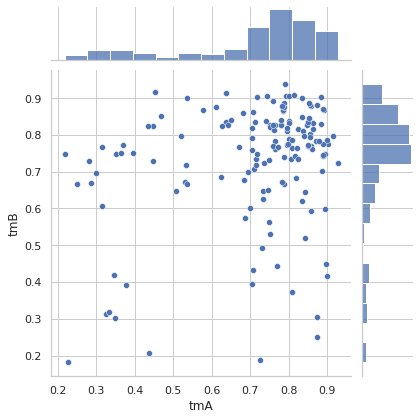

In [34]:

df_test= data_first["N1-merged"]
#plt.scatter(df_test.tmB,df_test.tmA)


sns_plot = sns.jointplot(data=df_test, x="tmA", y="tmB")
sns_plot.savefig("tmA-tmB.png")



In [35]:
df_test.loc[(df_test.tmA>0.8 )&(df_test.lenA>300)]["name"]


3669    1dfj_u1_A-1dfj_u2_A
3675    1ewy_u1_A-1ewy_u2_A
3687    1gg2_u1_A-1gg2_u2_A
3707    1k5g_u1_A-1k5g_u2_A
3717    1nbf_u1_A-1nbf_u2_A
3723    1oc0_u1_A-1oc0_u2_A
3747    1wq1_u1_A-1wq1_u2_A
3767    1zlh_u1_A-1zlh_u2_A
3775    2abz_u1_A-2abz_u2_A
3847    3a8i_u1_A-3a8i_u2_A
3865    3qlu_u1_A-3qlu_u2_A
3871    4bmp_u1_A-4bmp_u2_A
3899    4o4b_u1_A-4o4b_u2_A
3909    4pw9_u1_A-4pw9_u2_A
3925    4v2c_u1_A-4v2c_u2_A
3943    4yeb_u1_A-4yeb_u2_A
3951    5brr_u1_A-5brr_u2_A
3957    5eg3_u1_A-5eg3_u2_A
Name: name, dtype: object

Text(0, 0.5, 'TM trRosetta')

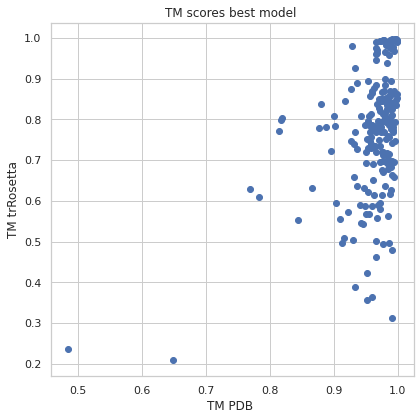

In [36]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["PDB"],data_max["trRosetta"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)
ax.set_title("TM scores best model ")
ax.set_xlabel("TM PDB ")
ax.set_ylabel("TM trRosetta")



Text(0, 0.5, 'dockQ')

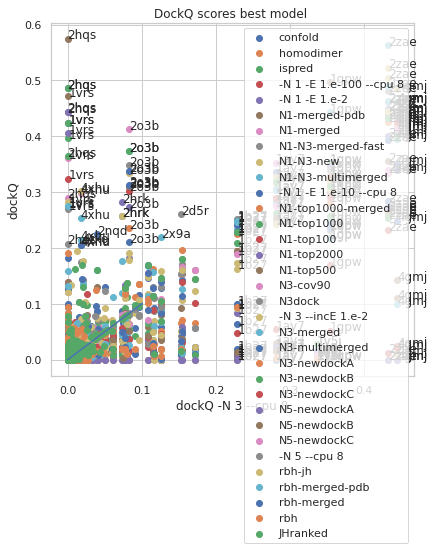

In [37]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

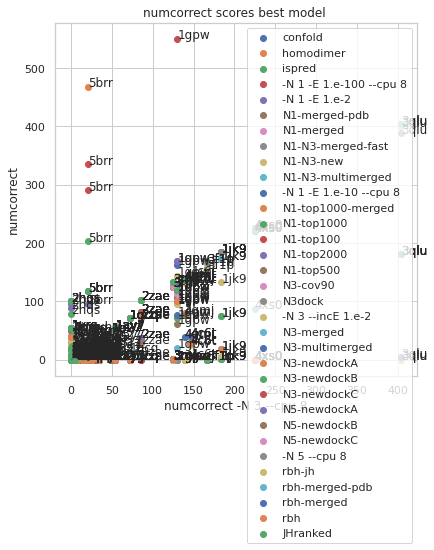

In [38]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

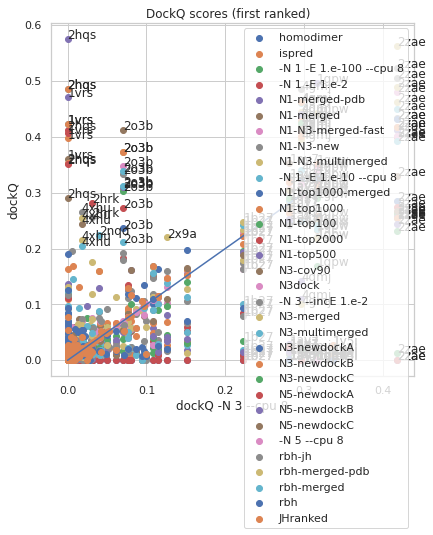

In [39]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

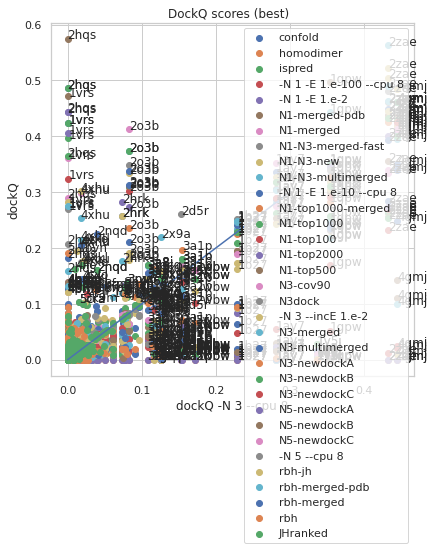

In [40]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

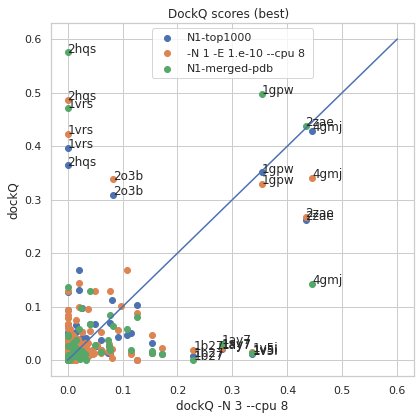

In [41]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [42]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock', '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'])

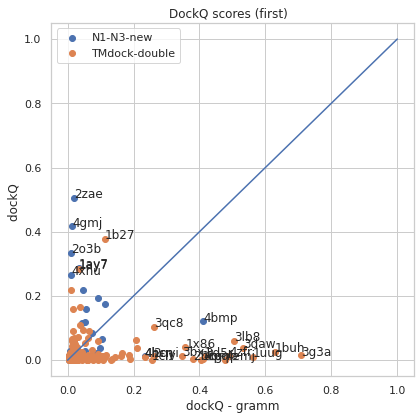

In [43]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-N3-new","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("tr-tn-gramm.png")
#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

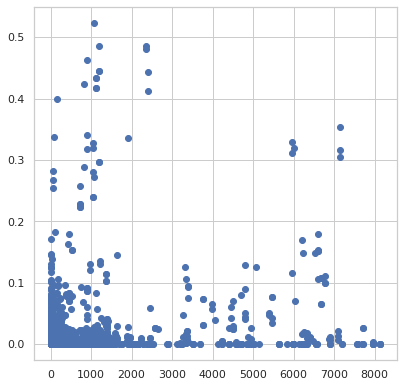

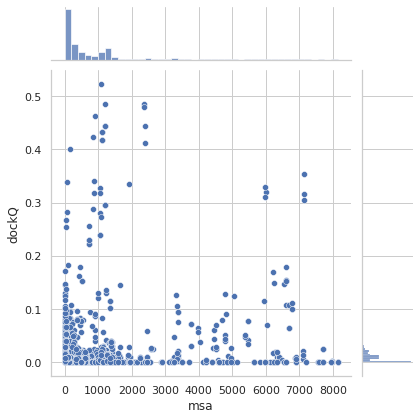

In [44]:
selset=['-N 3 --cpu 8', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ',  '-N 1 -E 1.e-10 --cpu 8 ',  '-N 3 --incE 1.e-2', '-N 5 --cpu 8']
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df.loc[(df.JHparams.isin(selset))]
plt.scatter(tempdf.msa,tempdf.dockQ)
plt.savefig("msa-dockq-scatter.png")
sns_plot=sns.jointplot(data=tempdf,x="msa",y="dockQ")
sns_plot.savefig("msa-dockq.png")


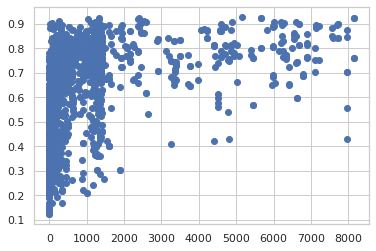

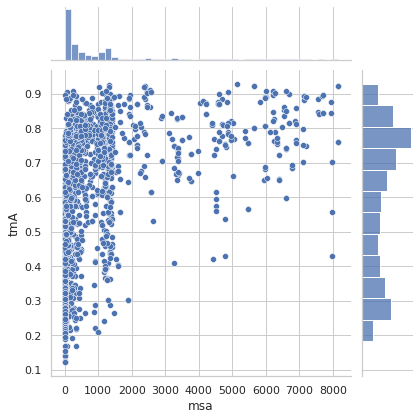

In [45]:
tempdf=df.loc[(df.JHparams.isin(selset))]
plt.scatter(tempdf.msa,tempdf.tmA)
#print (tempdf["msaA"])
#tempdf["logmsaA"]=np.log10(tempdf["msa"]+0.0000001)
plt.savefig("msa-tm-scatter.png")
sns_plot=sns.jointplot(data=tempdf,x="msa",y="tmA")
sns_plot.savefig("msa-tm.png")


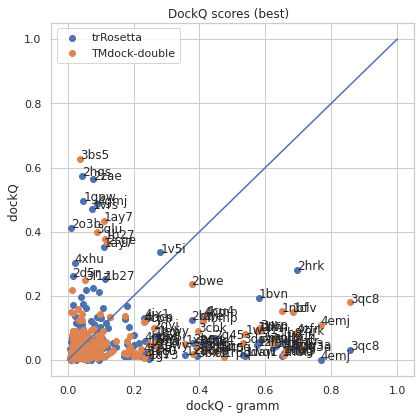

In [46]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("tr-tn-gramm-best.png")


NameError: name 'newdf' is not defined

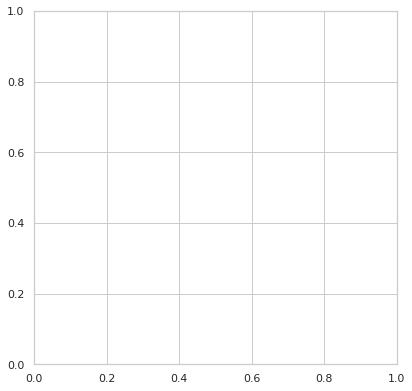

NameError: name 'newdf' is not defined

In [47]:
# FInd best method for each model.
selset=["gramm","TMdock-double","trRosetta"]
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df.loc[(df.JHparams.isin(selset))&(df.rank==1)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(selset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(selset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(selset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
print (data)    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))
#sns.jointplot(data=df_merged,x=

plt.savefig("tm-tr-gramm-best-violin.png")


NameError: name 'newdf' is not defined

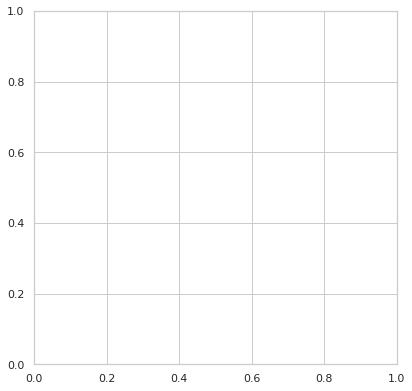

NameError: name 'newdf' is not defined

In [48]:
# FInd best method for each model.
selset=["gramm","TMdock-double","N1-N3-new"]
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df.loc[(df.JHparams.isin(selset))&(df.rank==1)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(selset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_first.loc[(df_first.CODE.isin(codes))&(df_first.params.isin(selset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("First ranked models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(selset):
    done[d]=0
    average[d]=all_df.loc[all_df.CODE.isin(codes)&(all_df.params==d)]["dockQ"].mean()
    length[d]=len(all_df.loc[all_df.CODE.isin(codes)&(all_df.params==d)]["dockQ"])
    pos+=[i]
    data+=[all_df.loc[all_df.CODE.isin(codes)&(all_df.params==d)]["dockQ"]]
    i+=1
    print (d)
print (data)    
ax.violinplot(data,pos)
#, points=80, vert=False, widths=0.7,
#                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))
#sns.jointplot(data=df_merged,x=

plt.savefig("tm-tr-gramm-violin.png")


Text(0, 0.5, 'dockQ ')

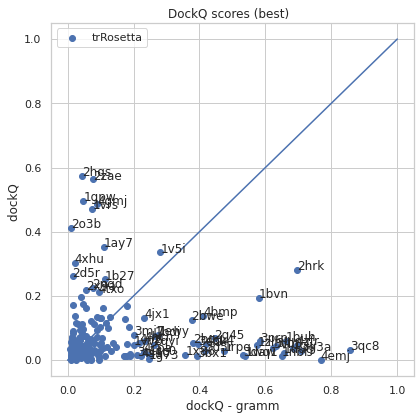

In [49]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [50]:
d="TMdock"
foo=pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
data_first[d].dockQ
foo[["dockQ_x","dockQ_y"]]
#cc=np.corrcoef(foo.dockQ_x,foo.dockQ_y)

foo.dockQ_y.isna().unique()
data_first[d].dockQ.isna().unique()

array([False])

TMdock-double
220 220
trRosetta
2877 2877


Text(20.200000000000003, 0.5, 'dockQ TMdock')

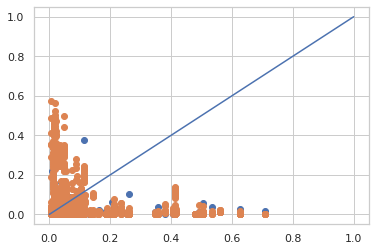

In [51]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double","trRosetta"]:
    #if d!="N1-merged":continue   
    print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    print(df_merged.dockQ_x.shape[0],df_merged.dockQ_y.shape[0])
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_x)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model) ") #, CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

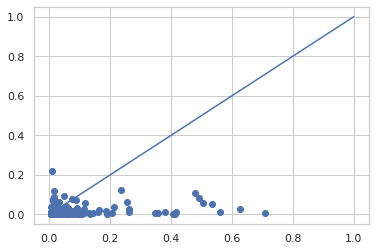

In [52]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    #cc=np.corrcoef(df_merged.dockQ_y,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

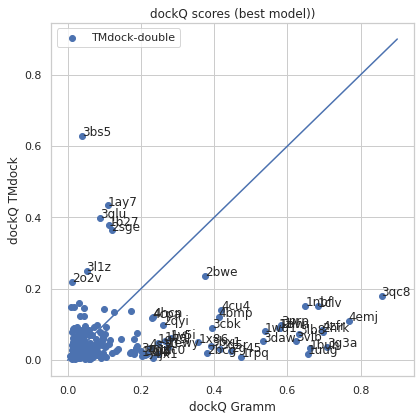

In [53]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

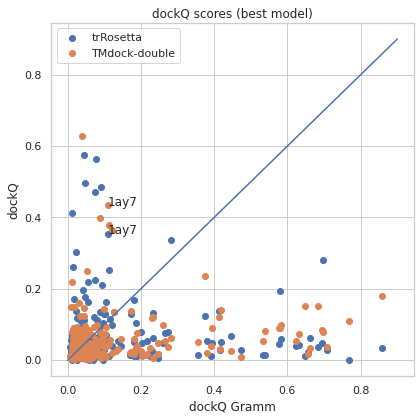

In [54]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):
        if (sstr=="1ay7" ):
            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [55]:
df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]
df_merged.sort_values("dockQ")

name  lenA  lenB     msa      msaA      msaB  \
JHparams  code                                                                
trRosetta 1uad  1uad_u2_A-1uad_u1_A   163   163  2378.0  316984.0  316984.0   
          3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0   35975.0   35975.0   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   359.0   55937.0   55937.0   
          4emj  4emj_u2_A-4emj_u1_A   403   403  6589.0  354953.0  354953.0   
          3oed  3oed_u2_A-3oed_u1_A   295   295   360.0   41629.0   41661.0   
...                             ...   ...   ...     ...       ...       ...   
gramm     4zfr  4zfr_u1_A-4zfr_u2_A   186    77     0.0       0.0       0.0   
          2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0       0.0       0.0   
          3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0       0.0       0.0   
          4emj  4emj_u1_A-4emj_u2_A   403   106     0.0       0.0       0.0   
          3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0       0.0       0.0   

                cdhit  dockQ   fnat     iRMS  ...  CODE     params      tmAB  \
JHparams  code                                ...                              
trRosetta 1uad   1729  0.000  0.000  297.154  ...  1uad  trRosetta  0.751370   
          3fap    573  0.000  0.000  187.525  ...  3fap  trRosetta  0.840125   
          3rj3    247  0.000  0.000  515.213  ...  3rj3  trRosetta  0.635370   
          4emj   5681  0.000  0.000  687.538  ...  4emj  trRosetta  0.884110   
          3oed    262  0.001  0.000  518.652  ...  3oed  trRosetta  0.630830   
...               ...    ...    ...      ...  ...   ...        ...       ...   
gramm     4zfr      0  0.695  0.887    9.940  ...  4zfr      gramm  1.000000   
          2hrk      0  0.696  0.978   13.721  ...  2hrk      gramm  1.000000   
          3g3a      0  0.708  0.787   11.568  ...  3g3a      gramm  1.000000   
          4emj      0  0.768  0.762    3.742  ...  4emj      gramm  1.000000   
          3qc8      0  0.857  0.977   11.047  ...  3qc8      gramm  1.000000   

                   msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams  code                                                       
trRosetta 1uad  170578.5   0.82646   316984.0   0.71369    24173.0   
          3fap   18731.0   0.87845    35975.0   0.80207     1489.0   
          3rj3   39722.5   0.80210    55937.0   0.48427    23508.0   
          4emj  195361.5   0.90839   354953.0   0.86736    35929.0   
          3oed   32568.5   0.77957    41661.0   0.50462    23508.0   
...                  ...       ...        ...       ...        ...   
gramm     4zfr       0.0   1.00000        0.0   1.00000        0.0   
          2hrk       0.0   1.00000        0.0   1.00000        0.0   
          3g3a       0.0   1.00000        0.0   1.00000        0.0   
          4emj       0.0   1.00000        0.0   1.00000        0.0   
          3qc8       0.0   1.00000        0.0   1.00000        0.0   

                numcorrect  len  
JHparams  code                   
trRosetta 1uad         0.0  259  
          3fap         0.0  201  
          3rj3         0.0  421  
          4emj         0.0  509  
          3oed         0.0  426  
...                    ...  ...  
gramm     4zfr         0.0  263  
          2hrk         0.0  302  
          3g3a         0.0  296  
          4emj         0.0  509  
          3qc8         0.0  251  

[666 rows x 54 columns]

In [56]:
len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

58

In [57]:
len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

15

In [58]:
len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

40

In [59]:
len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

8

In [60]:
len(df_merged["CODE"].unique())

223

In [61]:
df.loc[df.params=="TMdock-double"].sort_values("dockQ")

name       JHparams lenA lenB msa msaA msaB cdhit  \
13718  3hzi_u1_A-3hzi_u2_A  TMdock-double  410   70   0    0    0     0   
13481  2x0b_u1_A-2x0b_u2_A  TMdock-double  439  330   0    0    0     0   
14495  4rws_u1_A-4rws_u2_A  TMdock-double  434   72   0    0    0     0   
13503  2xwb_u1_A-2xwb_u2_A  TMdock-double  711  229   0    0    0     0   
12995  1y64_u1_A-1y64_u2_A  TMdock-double  412  361   0    0    0     0   
...                    ...            ...  ...  ...  ..  ...  ...   ...   
13932  3qlu_u1_A-3qlu_u2_A  TMdock-double  384  374   0    0    0     0   
12495  1ay7_u1_A-1ay7_u2_A  TMdock-double   97   90   0    0    0     0   
13567  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0     0   
13563  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0     0   
13572  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0     0   

       dockQ   fnat  ...  CODE         params tmAB msaAB tmAB_max msaAB_max  \
13718      0      0  ...  3hzi  TMdock-double  1.0   0.0      1.0       0.0   
13481      0      0  ...  2x0b  TMdock-double  1.0   0.0      1.0       0.0   
14495      0      0  ...  4rws  TMdock-double  1.0   0.0      1.0       0.0   
13503      0      0  ...  2xwb  TMdock-double  1.0   0.0      1.0       0.0   
12995      0      0  ...  1y64  TMdock-double  1.0   0.0      1.0       0.0   
...      ...    ...  ...   ...            ...  ...   ...      ...       ...   
13932  0.398  0.542  ...  3qlu  TMdock-double  1.0   0.0      1.0       0.0   
12495  0.434  0.417  ...  1ay7  TMdock-double  1.0   0.0      1.0       0.0   
13567  0.539    0.9  ...  3bs5  TMdock-double  1.0   0.0      1.0       0.0   
13563   0.56    0.7  ...  3bs5  TMdock-double  1.0   0.0      1.0       0.0   
13572  0.628  0.833  ...  3bs5  TMdock-double  1.0   0.0      1.0       0.0   

      tmAB_min msaAB_min numcorrect  len  
13718      1.0       0.0          0  480  
13481      1.0       0.0          0  769  
14495      1.0       0.0          0  506  
13503      1.0       0.0          0  940  
12995      1.0       0.0          0  773  
...        ...       ...        ...  ...  
13932      1.0       0.0    404.022  758  
12495      1.0       0.0     53.985  187  
13567      1.0       0.0     34.196  160  
13563      1.0       0.0     34.196  160  
13572      1.0       0.0     34.196  160  

[2210 rows x 56 columns]

In [62]:
df_merged.groupby(["CODE"]).median().sort_values("dockQ")


lenA   lenB     msa     msaA     msaB  cdhit   dockQ   fnat      iRMS  \
CODE                                                                           
3rj3  295.0  126.0     0.0      0.0      0.0    0.0  0.0090  0.000   56.4120   
1ycs  197.0  195.0     0.0      0.0      0.0    0.0  0.0090  0.000   64.5590   
2xwb  711.0  229.0     0.0      0.0      0.0    0.0  0.0100  0.000  121.5480   
2o25  202.0  160.0     0.0      0.0      0.0    0.0  0.0110  0.000   36.8090   
1te1  275.0  191.0     0.0      0.0      0.0    0.0  0.0110  0.000   96.5570   
...     ...    ...     ...      ...      ...    ...     ...    ...       ...   
1b27  109.0   90.0     0.0      0.0      0.0    0.0  0.2520  0.160   32.7470   
1vrs  124.0  120.5  1045.5  50159.5  50159.5  989.0  0.2735  0.306  119.8405   
1v5i  276.0   78.0     0.0      0.0      0.0    0.0  0.2810  0.191   21.3190   
2hrk  181.0  121.0     0.0      0.0      0.0    0.0  0.2820  0.326   26.7580   
1ay7   97.0   90.0     0.0      0.0      0.0    0.0  0.3530  0.417   22.9850   

         LRMS  ...  hhscore  rank      tmAB    msaAB  tmAB_max  msaAB_max  \
CODE           ...                                                          
3rj3  155.522  ...      0.4  10.0  1.000000      0.0   1.00000        0.0   
1ycs  155.576  ...      0.0  10.0  0.670775      0.0   1.00000        0.0   
2xwb  284.261  ...    278.0  10.0  1.000000      0.0   1.00000        0.0   
2o25  108.784  ...    266.4  10.0  1.000000      0.0   1.00000        0.0   
1te1  218.166  ...      0.0  10.0  1.000000      0.0   1.00000        0.0   
...       ...  ...      ...   ...       ...      ...       ...        ...   
1b27   74.608  ...     13.5  10.0  1.000000      0.0   1.00000        0.0   
1vrs  254.212  ...      9.0   6.0  0.817912  25780.5   0.99644    50159.5   
1v5i   69.688  ...      0.4  10.0  1.000000      0.0   1.00000        0.0   
2hrk   75.198  ...    141.4  10.0  1.000000      0.0   1.00000        0.0   
1ay7   72.032  ...      0.4  10.0  1.000000      0.0   1.00000        0.0   

      tmAB_min  msaAB_min  numcorrect    len  
CODE                                          
3rj3  1.000000        0.0       0.000  421.0  
1ycs  0.635710        0.0       0.000  392.0  
2xwb  1.000000        0.0       0.000  940.0  
2o25  1.000000        0.0       0.000  362.0  
1te1  1.000000        0.0       0.000  466.0  
...        ...        ...         ...    ...  
1b27  1.000000        0.0      49.025  199.0  
1vrs  0.639385     1401.5      26.994  241.0  
1v5i  1.000000        0.0       1.000  354.0  
2hrk  1.000000        0.0       0.000  302.0  
1ay7  1.000000        0.0      53.985  187.0  

[223 rows x 51 columns]

Text(0, 0.5, 'dockQ TMdock')

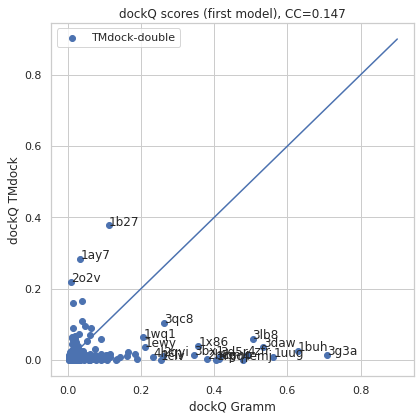

In [63]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

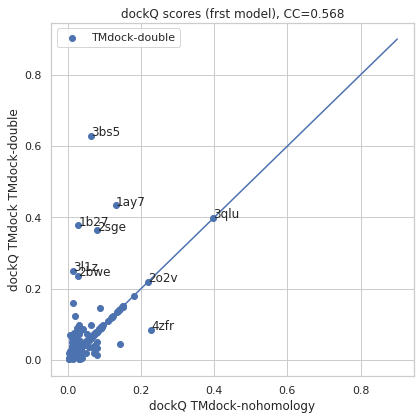

In [64]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

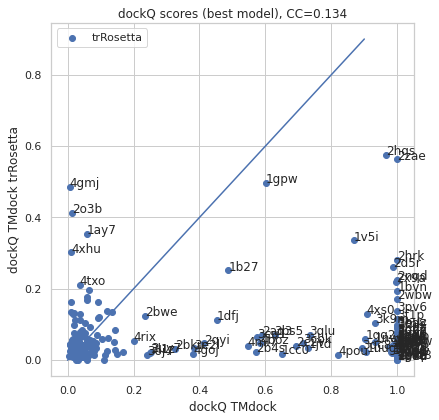

In [65]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

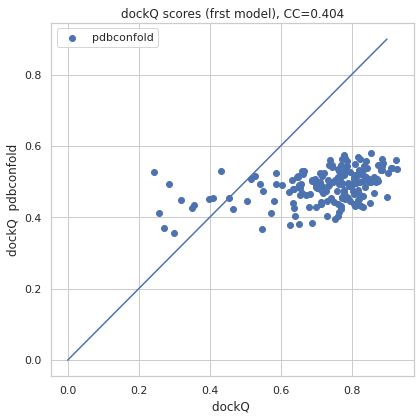

In [66]:
cutoff=1.0
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts-new":continue
    df_merged = pd.merge(data_max["pdbcontacts-new"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)
plt.savefig("pdbconfold.png")
#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ  pdbconfold')

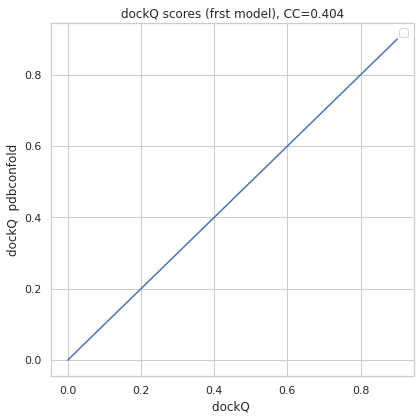

In [67]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*step1.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDB')

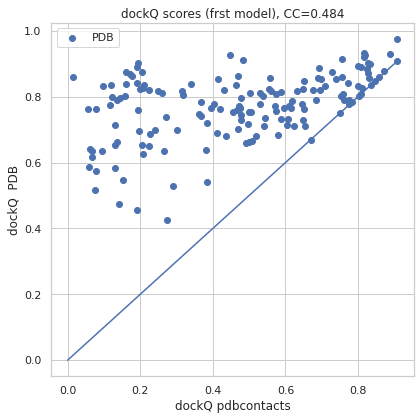

In [68]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["PDB"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ pdbcontacts")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbconfold')

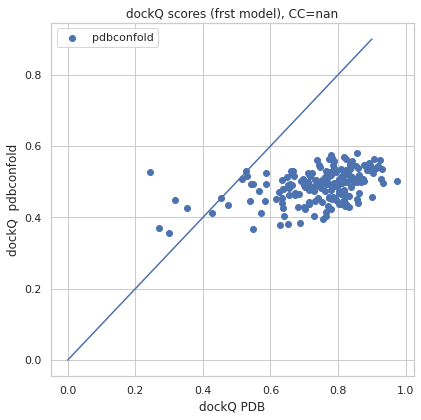

In [69]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ PDB")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

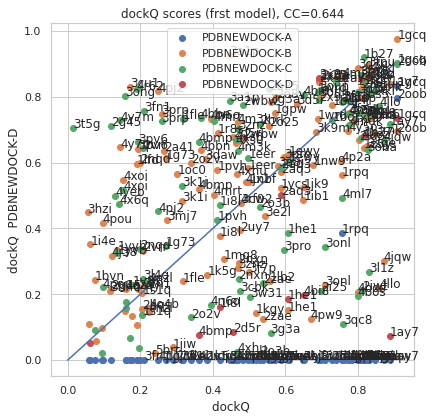

In [70]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-[ABCD]$")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

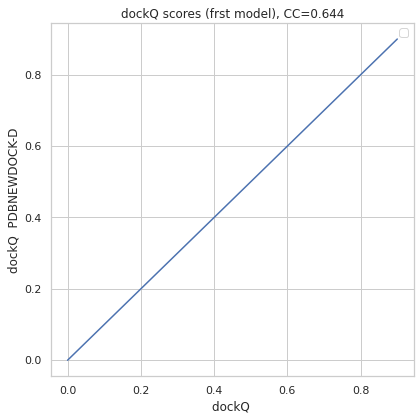

In [71]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockB-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

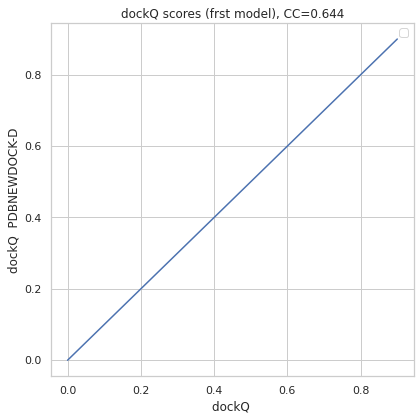

In [72]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockC-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

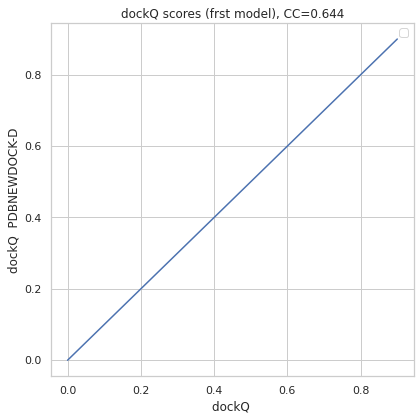

In [73]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockD-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C')

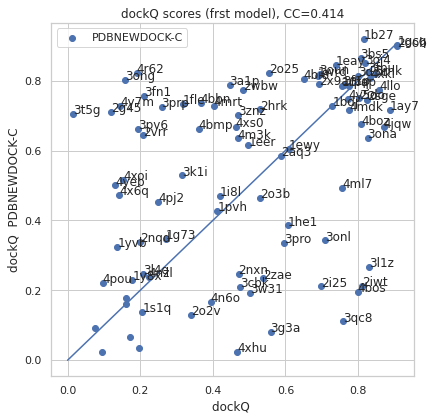

In [74]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-A--dockC-relax'

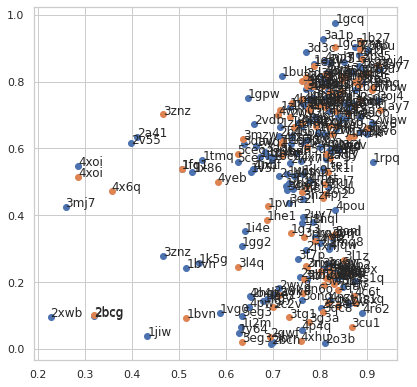

KeyError: 'PDBNEWDOCK-A--dockC-relax'

In [75]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts-new":continue
    df_merged = pd.merge(data_max["pdbcontacts-new"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbconfold')

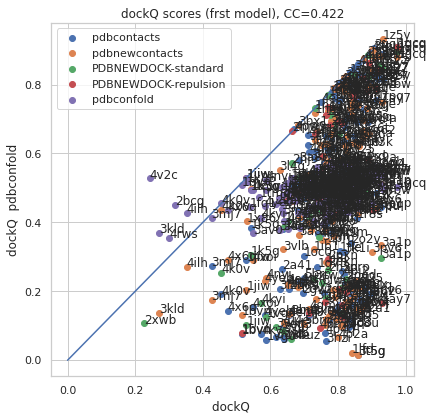

In [76]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion","pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    #if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [77]:
r=re.compile(".*relax.*")
#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]
pdbset=sorted(["PDB","PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax","pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard",
               "PDBNEWDOCK-repulsion","pdbconfold"])


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-C")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes=smallset

In [78]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()

PDB
PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
PDBNEWDOCK-repulsion
PDBNEWDOCK-standard
pdbconfold
pdbcontacts
pdbnewcontacts


IndexError: index out of bounds

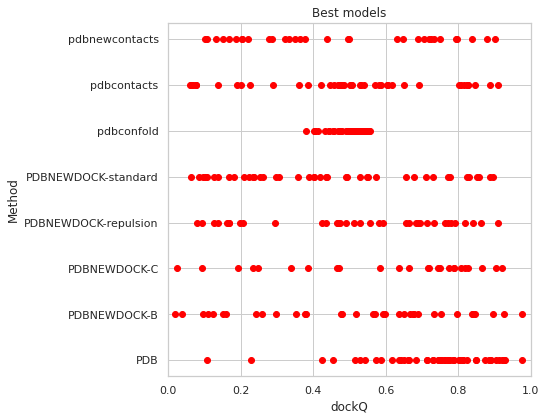

IndexError: index out of bounds

In [79]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [80]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A',
       'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb',
       'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'],
      dtype=object)

In [81]:
pdbset=[ 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA','N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8',"-N 3 --cpu 8"]
codes=df_max.loc[(df_max.params=="N3-newdockC")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes

array(['1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '1jiw', '1k5g', '1nql', '1vg0', '2aq3', '2b4s', '2d5r', '2hj9',
       '2hrk', '2ido', '2nqd', '2nxn', '2o3b', '2sge', '2wbw', '2x9a',
       '2zae', '3a1p', '3a8i', '3bs5', '3cw2', '3fpu', '3lwn', '3ona',
       '3rnk', '3w31', '4bi8', '4bmp', '4gmj', '4hcn', '4xhu'],
      dtype=object)

Text(0, 0.5, 'dockQ  -N 3 --cpu 8')

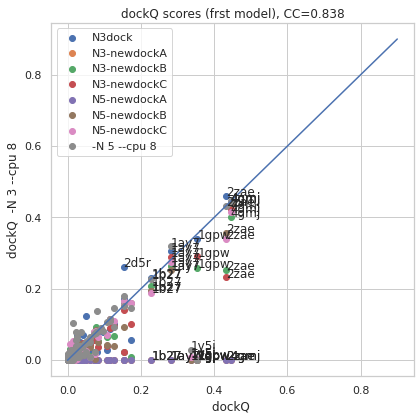

In [82]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="-N 3 --cpu 8":continue
    df_merged = pd.merge(data_max["-N 3 --cpu 8"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

-N 3 --cpu 8 39
-N 5 --cpu 8 39
N3-newdockA 39
N3-newdockB 38
N3-newdockC 39
N3dock 39
N5-newdockA 39
N5-newdockB 39
N5-newdockC 39


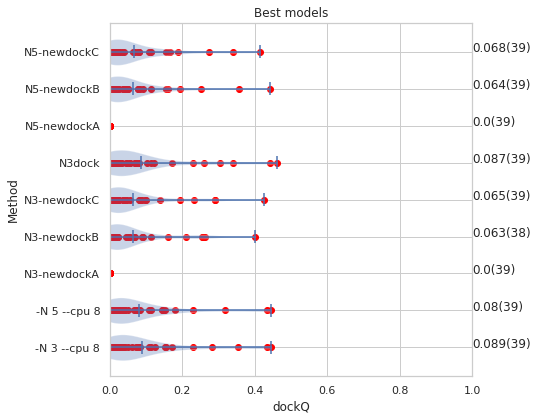

In [83]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    print (d,len(data[i]))
    i+=1
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [84]:
pdbset=sorted(["N1","N3"])

In [85]:
for d in pdbset:
    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

N1 0
N3 0


In [86]:
all_df

JHparams  code                 name  lenA  lenB     msa     msaA  \
0    -N 3 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   2034.0   
1    -N 3 --cpu 8  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   2034.0   
2    -N 3 --cpu 8  1bvn  1bvn_u2_A-1bvn_u1_A   496   496    95.0  52623.0   
3    -N 3 --cpu 8  1gcq  1gcq_u2_A-1gcq_u1_A    66    66  1365.0  77704.0   
4    -N 3 --cpu 8  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0  67629.0   
..            ...   ...                  ...   ...   ...     ...      ...   
345   N5-newdockC  4bi8  4bi8_u1_A-4bi8_u2_A   164    94    51.0    291.0   
346   N5-newdockC  4bmp  4bmp_u1_A-4bmp_u2_A   301   118  4607.0   9429.0   
347   N5-newdockC  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   6344.0   
348   N5-newdockC  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     1.0     20.0   
349   N5-newdockC  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   9970.0   

        msaB  cdhit  dockQ  ...  CODE        params      tmAB    msaAB  \
0     2034.0   1026  0.281  ...  1ay7  -N 3 --cpu 8  0.828190   1759.5   
1     2034.0    656  0.229  ...  1b27  -N 3 --cpu 8  0.824750   1759.0   
2    52623.0     85  0.013  ...  1bvn  -N 3 --cpu 8  0.619740  26373.0   
3    77704.0    771  0.115  ...  1gcq  -N 3 --cpu 8  0.555390  77600.5   
4    67629.0   5348  0.354  ...  1gpw  -N 3 --cpu 8  0.889770  63047.5   
..       ...    ...    ...  ...   ...           ...       ...      ...   
345    382.0     50  0.026  ...  4bi8   N5-newdockC  0.695005    336.5   
346  15729.0   2901  0.004  ...  4bmp   N5-newdockC  0.811060  12579.0   
347   6344.0    546  0.414  ...  4gmj   N5-newdockC  0.831935   3998.5   
348  41925.0      1  0.014  ...  4hcn   N5-newdockC  0.467315  20972.5   
349   9970.0    240  0.007  ...  4xhu   N5-newdockC  0.730560   5259.0   

     tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0     0.84625     2034.0   0.81013     1485.0      53.985  187  
1     0.85428     2034.0   0.79522     1484.0      49.025  199  
2     0.70905    52623.0   0.53043      123.0       0.000  571  
3     0.63426    77704.0   0.52080    77497.0      71.760  123  
4     0.89718    67629.0   0.88236    58466.0     130.000  456  
..        ...        ...       ...        ...         ...  ...  
345   0.78100      382.0   0.60901      291.0       0.000  258  
346   0.86858    15729.0   0.75354     9429.0       0.000  419  
347   0.85148     6344.0   0.82721     1653.0     139.104  489  
348   0.61756    41925.0   0.31707       20.0       0.000  327  
349   0.75557     9970.0   0.70555      548.0       0.000  447  

[350 rows x 56 columns]

In [87]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


In [88]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A',
       'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb',
       'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'],
      dtype=object)

In [89]:
r=re.compile(".*relax.*")
pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts","pdbconfold","PDB"]


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()


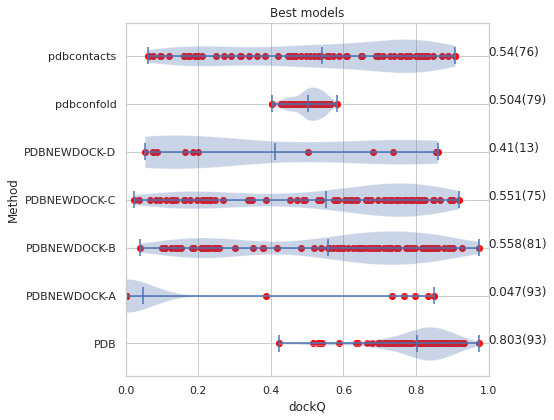

In [90]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [91]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1eay', '1eer',
       '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq', '1gpw', '1he1',
       '1i4e', '1i8l', '1jiw', '1k5g', '1kgy', '1lb2', '1lfd', '1nql',
       '1qav', '1rpq', '1vg0', '1vrs', '1wrd', '1xt9', '1y8x', '1z5y',
       '2aq3', '2b4s', '2bwe', '2c2v', '2d5r', '2ejf', '2g45', '2grx',
       '2gwf', '2hj9', '2hrk', '2i25', '2ido', '2iwt', '2nqd', '2o25',
       '2o2v', '2oob', '2qyi', '2sge', '2wbw', '2wy7', '2wy8', '2x9a',
       '2xgy', '2zae', '3a1p', '3bs5', '3cu1', '3d3c', '3f1p', '3fap',
       '3fn1', '3fpu', '3g3a', '3k1i', '3l1z', '3oj4', '3ona', '3onl',
       '3qc8', '3rj3', '3rnk', '4bi8', '4bmp', '4bos', '4boz', '4c6t',
       '4jqw', '4m3k', '4ml7', '4pj2', '4pou', '4r62', '4txo', '4xkl',
       '4xs0', '4y5o', '4zfr', '5cra', '5eg3'], dtype=object)

In [92]:
all_df

JHparams  code                 name  lenA  lenB  msa  msaA  msaB  \
0            PDB  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  0.0   0.0   0.0   
1            PDB  1b27  1b27_u2_A-1b27_u1_A   109   109  0.0   0.0   0.0   
2            PDB  1bdj  1bdj_u2_A-1bdj_u1_A   129   129  0.0   0.0   0.0   
3            PDB  1buh  1buh_u2_A-1buh_u1_A   291   291  0.0   0.0   0.0   
4            PDB  1bvn  1bvn_u2_A-1bvn_u1_A   496   496  0.0   0.0   0.0   
..           ...   ...                  ...   ...   ...  ...   ...   ...   
505  pdbcontacts  4r62  4r62_u2_A-4r62_u1_A    77   154  0.0   0.0   0.0   
506  pdbcontacts  4xkl  4xkl_u2_A-4xkl_u1_A    34    76  0.0   0.0   0.0   
507  pdbcontacts  4xs0  4xs0_u2_A-4xs0_u1_A   141   147  0.0   0.0   0.0   
508  pdbcontacts  4y5o  4y5o_u2_A-4y5o_u1_A    85    94  0.0   0.0   0.0   
509  pdbcontacts  5eg3  5eg3_u1_A-5eg3_u2_A   303   105  0.0   0.0   0.0   

     cdhit  dockQ  ...  CODE       params      tmAB  msaAB  tmAB_max  \
0        0  0.929  ...  1ay7          PDB  0.998225    0.0   0.99846   
1        0  0.919  ...  1b27          PDB  0.996305    0.0   0.99634   
2        0  0.876  ...  1bdj          PDB  0.991110    0.0   0.99189   
3        0  0.818  ...  1buh          PDB  0.954555    0.0   0.98447   
4        0  0.516  ...  1bvn          PDB  0.932855    0.0   0.93404   
..     ...    ...  ...   ...          ...       ...    ...       ...   
505      0  0.191  ...  4r62  pdbcontacts  0.592005    0.0   0.84316   
506      0  0.833  ...  4xkl  pdbcontacts  0.982790    0.0   0.99132   
507      0  0.463  ...  4xs0  pdbcontacts  0.832175    0.0   0.97030   
508      0  0.773  ...  4y5o  pdbcontacts  0.951865    0.0   0.99590   
509      0  0.094  ...  5eg3  pdbcontacts  0.909250    0.0   0.91808   

     msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0          0.0   0.99799        0.0         0.0  187  
1          0.0   0.99627        0.0         0.0  199  
2          0.0   0.99097        0.0         0.0  247  
3          0.0   0.92508        0.0         0.0  363  
4          0.0   0.93167        0.0         0.0  571  
..         ...       ...        ...         ...  ...  
505        0.0   0.34085        0.0         0.0  231  
506        0.0   0.97426        0.0         0.0  110  
507        0.0   0.69405        0.0         0.0  288  
508        0.0   0.90783        0.0         0.0  179  
509        0.0   0.90042        0.0         0.0  408  

[510 rows x 56 columns]

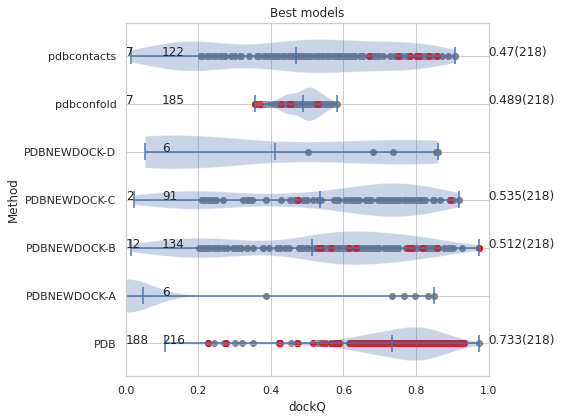

In [93]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


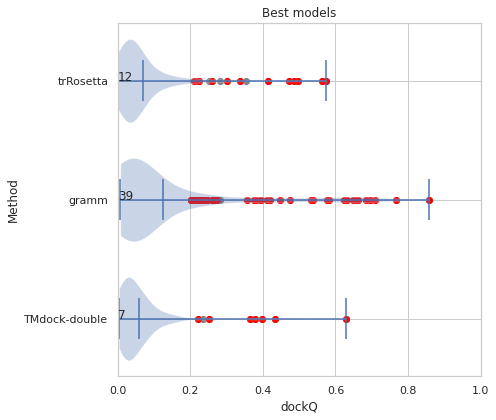

In [94]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+
        #            "("+str(length[good_df.JHparams[i]])+")"
        #            ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [95]:
best_df

index       JHparams  code                 name  lenA  lenB     msa  \
0     852          gramm  3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0   
1     857          gramm  4emj  4emj_u1_A-4emj_u2_A   403   106     0.0   
2     847          gramm  3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0   
3     841          gramm  2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0   
4     862          gramm  4zfr  4zfr_u1_A-4zfr_u2_A   186    77     0.0   
5     827          gramm  1clv  1clv_u1_A-1clv_u2_A   471    33     0.0   
6     824          gramm  1buh  1buh_u1_A-1buh_u2_A   291    72     0.0   
7     832          gramm  1uug  1uug_u1_A-1uug_u2_A   230    83     0.0   
8     830          gramm  1nbf  1nbf_u1_A-1nbf_u2_A   340    78     0.0   
9     848          gramm  3lb8  3lb8_u1_A-3lb8_u2_A   422   107     0.0   
10    807  TMdock-double  3bs5  3bs5_u1_A-3bs5_u2_A    84    76     0.0   
11    853          gramm  3vlb  3vlb_u1_A-3vlb_u2_A   413   222     0.0   
12    851          gramm  3prp  3prp_u1_A-3prp_u2_A   184    77     0.0   
13    825          gramm  1bvn  1bvn_u1_A-1bvn_u2_A   496    75     0.0   
14    837          gramm  1zlh  1zlh_u1_A-1zlh_u2_A   306    76     0.0   
15   1524      trRosetta  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2536.0   
16   1529      trRosetta  2zae  2zae_u2_A-2zae_u1_A   107   107  1125.0   
17    834          gramm  1wq1  1wq1_u1_A-1wq1_u2_A   325   167     0.0   
18    846          gramm  3daw  3daw_u1_A-3daw_u2_A   360   143     0.0   
19   1520      trRosetta  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7203.0   
20   1530      trRosetta  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   
21    831          gramm  1rpq  1rpq_u1_A-1rpq_u2_A   174    22     0.0   
22   1522      trRosetta  1vrs  1vrs_u2_A-1vrs_u1_A   124   124  2091.0   
23    840          gramm  2g45  2g45_u1_A-2g45_u2_A   114    77     0.0   
24    802  TMdock-double  1ay7  1ay7_u1_A-1ay7_u2_A    97    90     0.0   
25    856          gramm  4cu4  4cu4_u1_A-4cu4_u2_A   706    22     0.0   
26    845          gramm  3d5r  3d5r_u1_A-3d5r_u2_A   295    62     0.0   
27   1527      trRosetta  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
28    854          gramm  4bmp  4bmp_u1_A-4bmp_u2_A   301   118     0.0   
29    809  TMdock-double  3qlu  3qlu_u1_A-3qlu_u2_A   384   374     0.0   
30    844          gramm  3cbk  3cbk_u1_A-3cbk_u2_A   257   111     0.0   
31    843          gramm  3bx1  3bx1_u1_A-3bx1_u2_A   270   182     0.0   
32    838          gramm  2bcg  2bcg_u1_A-2bcg_u2_A   440   179     0.0   
33    803  TMdock-double  1b27  1b27_u1_A-1b27_u2_A   109    90     0.0   
34    839          gramm  2bwe  2bwe_u1_A-2bwe_u2_A    78    47     0.0   
35    806  TMdock-double  2sge  2sge_u1_A-2sge_u2_A   186    57     0.0   
36    835          gramm  1x86  1x86_u1_A-1x86_u2_A   353   181     0.0   
37   1521      trRosetta  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
38   1532      trRosetta  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
39    828          gramm  1ewy  1ewy_u1_A-1ewy_u2_A   304    99     0.0   
40    823          gramm  1bdj  1bdj_u1_A-1bdj_u2_A   129   118     0.0   
41   1523      trRosetta  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   
42    842          gramm  2qyi  2qyi_u1_A-2qyi_u2_A   224   180     0.0   
43    808  TMdock-double  3l1z  3l1z_u1_A-3l1z_u2_A   153    86     0.0   
44    826          gramm  1cc0  1cc0_u1_A-1cc0_u2_A   178   149     0.0   
45    829          gramm  1g73  1g73_u1_A-1g73_u2_A   174    97     0.0   
46    858          gramm  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     0.0   
47    859          gramm  4jx1  4jx1_u1_A-4jx1_u2_A   405   107     0.0   
48    855          gramm  4cpa  4cpa_u1_A-4cpa_u2_A   308    40     0.0   
49   1526      trRosetta  2nqd  2nqd_u2_A-2nqd_u1_A   221   221   266.0   
50    861          gramm  4s10  4s10_u1_A-4s10_u2_A   130   104     0.0   
51   1528      trRosetta  2x9a  2x9a_u2_A-2x9a_u1_A   103   103     4.0   
52    805  TMdock-double  2o2

In [96]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uad', '1uug', '1v5i', '1vg0', '1wq1', '1wrd',
       '1x86', '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y',
       '1zlh', '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg',
       '2bcn', '2bku', '2bov', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r',
       '2ejf', '2g45', '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25',
       '2ido', '2iwt', '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v',
       '2oob', '2qyi', '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw',
       '2wy7', '2wy8', '2x0b', '2x9a', '2xgy', '2xwb', '2zae', '3a1p',
       '3a8i', '3av0', '3bh6', '3bs5', '3buz', '3bx1', '3cbk', '3cu1',
      

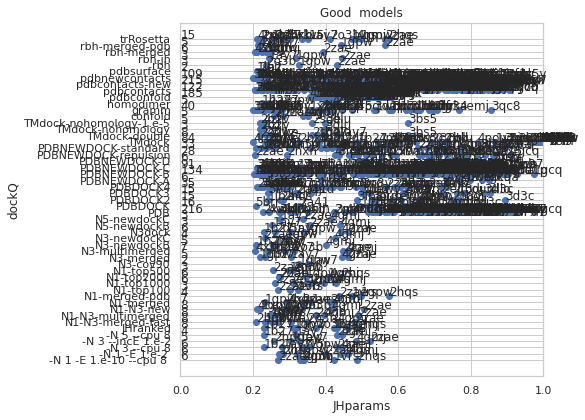

In [97]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

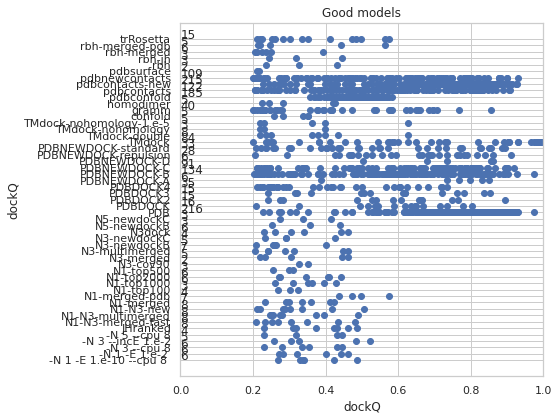

In [98]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

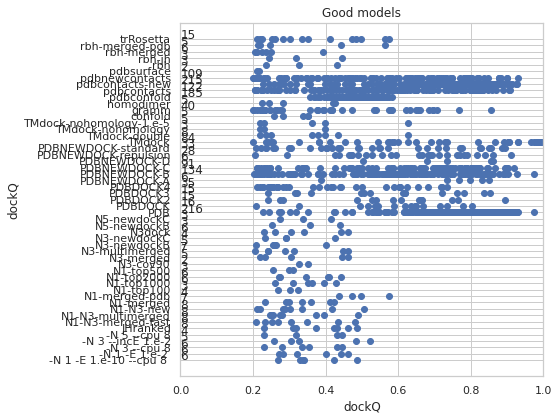

In [99]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [100]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A',
       'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb',
       'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'],
      dtype=object)

In [101]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbconfold', 'pdbcontacts-new', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'PDBNEWDOCK-repulsion', 'pdbsurface', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB']


index           JHparams  code                 name  lenA  lenB     msa  \
9       9     -N 1 -E 1.e-2   2hrk  2hrk_u1_A-2hrk_u2_A   181   121    59.0   
7      15       -N 3 --cpu 8  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
1      21  -N 3 --incE 1.e-2  2zae  2zae_u1_A-2zae_u2_A   107    93  1080.0   
3      22  -N 3 --incE 1.e-2  4gmj  4gmj_u1_A-4gmj_u2_A   253   236  1189.0   
11     36  N1-N3-merged-fast  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   
8      58          N1-N3-new  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
13     57          N1-N3-new  4txo  4txo_u2_A-4txo_u1_A   158   178  6263.0   
5      62          N1-merged  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
0      68      N1-merged-pdb  2hqs  2hqs_u2_A-2hqs_u1_A   398   398     0.0   
2      66      N1-merged-pdb  1gpw  1gpw_u1_A-1gpw_u2_A   252   204     0.0   
4      67      N1-merged-pdb  1vrs  1vrs_u2_A-1vrs_u1_A   124   124     0.0   
6      88           N3-cov90  1ay7  1ay7_u1_A-1ay7_u2_A    97    90   590.0   
10    114             N3dock  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   
12   1508         rbh-merged  2nqd  2nqd_u1_A-2nqd_u2_A   221   111    18.0   

       msaA      msaB  cdhit  ...  CODE             params      tmAB    msaAB  \
9     397.0      64.0     56  ...  2hrk     -N 1 -E 1.e-2   0.677510    230.5   
7   54177.0   54177.0   1646  ...  1v5i       -N 3 --cpu 8  0.826270  33121.5   
1    1732.0    1544.0    814  ...  2zae  -N 3 --incE 1.e-2  0.827755   1638.0   
3    6237.0    1654.0    514  ...  4gmj  -N 3 --incE 1.e-2  0.835100   3945.5   
11   2034.0    2034.0    656  ...  1b27  N1-N3-merged-fast  0.807315   1759.0   
8    8381.0    8381.0    240  ...  4xhu          N1-N3-new  0.827330   4344.0   
13  54068.0  120547.0   5896  ...  4txo          N1-N3-new  0.732770  87307.5   
5    5431.0    5431.0    301  ...  2o3b          N1-merged  0.727490   2974.5   
0       0.0       0.0      0  ...  2hqs      N1-merged-pdb  0.969605      0.0   
2       0.0       0.0      0  ...  1gpw      N1-merged-pdb  0.985625      0.0   
4       0.0       0.0      0  ...  1vrs      N1-merged-pdb  0.989810      0.0   
6    1485.0    2034.0    524  ...  1ay7           N3-cov90  0.806580   1759.5   
10   6154.0    6154.0    226  ...  2d5r             N3dock  0.774685   3962.5   
12  21051.0     801.0     18  ...  2nqd         rbh-merged  0.832645  10926.0   

    tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
9    0.70198      397.0   0.65304       64.0       1.972  302  
7    0.89294    54177.0   0.75960    12066.0       1.000  354  
1    0.83351     1732.0   0.82200     1544.0      71.978  200  
3    0.86274     6237.0   0.80746     1654.0     132.090  489  
11   0.84835     2034.0   0.76628     1484.0      49.025  199  
8    0.85317     8381.0   0.80149      307.0       0.000  447  
13   0.75571   120547.0   0.70983    54068.0       0.000  336  
5    0.83406     5431.0   0.62495      518.0      29.008  384  
0    0.97016        0.0   0.96905        0.0     100.035  507  
2    0.99259        0.0   0.97866        0.0       0.000  456  
4    0.99288        0.0   0.98674        0.0      53.988  241  
6    0.80717     2034.0   0.80599     1485.0      36.982  187  
10   0.87927     6154.0   0.68937     1771.0      17.996  386  
12   0.85500    21051.0   0.81029      801.0       0.000  332  

[14 rows x 57 columns]

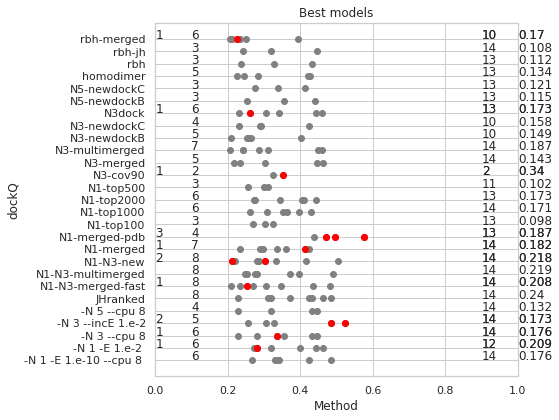

In [102]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [103]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

name   JHparams lenA lenB  msa msaA   msaB cdhit  dockQ  \
17665  2grx_u1_A-2grx_u2_A     TMdock  708   91    0    0      0     0      1   
17335  1tmq_u1_A-1tmq_u2_A     TMdock  471  123    0    0      0     0      1   
17705  2hrk_u1_A-2hrk_u2_A     TMdock  181  121    0    0      0     0      1   
17225  1mq8_u1_A-1mq8_u2_A     TMdock  186  176    0    0      0     0      1   
17235  1nbf_u1_A-1nbf_u2_A     TMdock  340   78    0    0      0     0      1   
...                    ...        ...  ...  ...  ...  ...    ...   ...    ...   
2926   4s10_u1_A-4s10_u2_A      gramm  130  104    0    0      0     0  0.224   
22006  5bmu_u2_A-5bmu_u1_A  trRosetta  161  169  178  261    491    85  0.113   
24875  4yoc_u1_A-4yoc_u2_A        PDB  905  530    0    0      0     0  0.107   
17588  2bov_u1_A-2bov_u2_A     TMdock  212  163    0    0      0     0   0.04   
21844  2x0b_u1_A-2x0b_u2_A  trRosetta  439  330  184  960  11320   112  0.025   

        fnat  ...  CODE     params      tmAB   msaAB tmAB_max msaAB_max  \
17665      1  ...  2grx     TMdock  1.000000     0.0  1.00000       0.0   
17335      1  ...  1tmq     TMdock  1.000000     0.0  1.00000       0.0   
17705      1  ...  2hrk     TMdock  1.000000     0.0  1.00000       0.0   
17225      1  ...  1mq8     TMdock  1.000000     0.0  1.00000       0.0   
17235      1  ...  1nbf     TMdock  1.000000     0.0  1.00000       0.0   
...      ...  ...   ...        ...       ...     ...      ...       ...   
2926    0.16  ...  4s10      gramm  1.000000     0.0  1.00000       0.0   
22006  0.196  ...  5bmu  trRosetta  0.469760   376.0  0.51121     491.0   
24875  0.319  ...  4yoc        PDB  0.300345     0.0  0.32157       0.0   
17588      0  ...  2bov     TMdock  1.000000     0.0  1.00000       0.0   
21844  0.053  ...  2x0b  trRosetta  0.310825  6140.0  0.31979   11320.0   

      tmAB_min msaAB_min numcorrect   len  
17665  1.00000       0.0          0   799  
17335  1.00000       0.0          0   594  
17705  1.00000       0.0          0   302  
17225  1.00000       0.0          0   362  
17235  1.00000       0.0          0   418  
...        ...       ...        ...   ...  
2926   1.00000       0.0          0   234  
22006  0.42831     261.0          0   330  
24875  0.27912       0.0          0  1435  
17588  1.00000       0.0          0   375  
21844  0.30186     960.0          0   769  

[223 rows x 56 columns]

In [104]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


JHparams  lenA  lenB     msa      msaA  \
name                                                                   
1ay7_u1_A-1ay7_u2_A             rbh-jh    97    90  1060.0    1490.0   
1ay7_u2_A-1ay7_u1_A          homodimer    90    97  1060.0    2034.0   
1b27_u1_A-1b27_u2_A          homodimer   109    90   733.0    1484.0   
1b27_u2_A-1b27_u1_A          homodimer    90   109   733.0    2034.0   
1gpw_u1_A-1gpw_u2_A         rbh-merged   252   204  7146.0   80768.0   
1gpw_u2_A-1gpw_u1_A             rbh-jh   204   252  7137.0   67629.0   
1v5i_u1_A-1v5i_u2_A       -N 3 --cpu 8   276    78  1922.0   54177.0   
1vrs_u1_A-1vrs_u2_A         N1-top2000   124   117   836.0  100319.0   
1vrs_u2_A-1vrs_u1_A         N1-top2000   117   124  2091.0    2803.0   
2d5r_u2_A-2d5r_u1_A             N3dock   121   265   521.0    1771.0   
2hqs_u1_A-2hqs_u2_A         N1-top2000   398   109  2396.0  376708.0   
2hqs_u2_A-2hqs_u1_A         N1-top2000   109   398  2535.0   32336.0   
2hrk_u1_A-2hrk_u2_A  -N 3 --incE 1.e-2   181   121   740.0   23616.0   
2nqd_u1_A-2nqd_u2_A         rbh-merged   221   111    18.0   21051.0   
2o3b_u1_A-2o3b_u2_A         rbh-merged   240   144   456.0    5431.0   
2zae_u1_A-2zae_u2_A         rbh-merged   107    93  1125.0    1818.0   
2zae_u2_A-2zae_u1_A             rbh-jh    93   107  1125.0    1521.0   
4gmj_u1_A-4gmj_u2_A         rbh-merged   253   236  1189.0    6344.0   
4gmj_u2_A-4gmj_u1_A          homodimer   236   253  1189.0    1653.0   
4txo_u2_A-4txo_u1_A          N1-N3-new   158   178  6263.0   54068.0   
4xhu_u1_A-4xhu_u2_A         rbh-merged   352    95   410.0    8381.0   
4xhu_u2_A-4xhu_u1_A     N3-multimerged    95   352   410.0     307.0   

                         msaB  cdhit  dockQ   fnat    iRMS  ...  CODE  \
name                                                        ...         
1ay7_u1_A-1ay7_u2_A    2039.0   1026  0.353  0.333   4.628  ...  1ay7   
1ay7_u2_A-1ay7_u1_A    1485.0    989  0.280  0.333   4.614  ...  1ay7   
1b27_u1_A-1b27_u2_A    2034.0    654  0.242  0.160   4.984  ...  1b27   
1b27_u2_A-1b27_u1_A    1484.0    656  0.252  0.200   5.319  ...  1b27   
1gpw_u1_A-1gpw_u2_A   76000.0   5374  0.497  0.560   5.499  ...  1gpw   
1gpw_u2_A-1gpw_u1_A   58466.0   5343  0.354  0.333   5.614  ...  1gpw   
1v5i_u1_A-1v5i_u2_A   12066.0   1642  0.336  0.191   3.748  ...  1v5i   
1vrs_u1_A-1vrs_u2_A    2803.0    806  0.472  0.449   2.953  ...  1vrs   
1vrs_u2_A-1vrs_u1_A  100319.0   1977  0.324  0.306   7.831  ...  1vrs   
2d5r_u2_A-2d5r_u1_A    6154.0    225  0.261  0.203  10.074  ...  2d5r   
2hqs_u1_A-2hqs_u2_A   32336.0   2014  0.575  0.526   3.771  ...  2hqs   
2hqs_u2_A-2hqs_u1_A  376708.0   2200  0.480  0.395   3.485  ...  2hqs   
2hrk_u1_A-2hrk_u2_A    9957.0    558  0.282  0.261   4.982  ...  2hrk   
2nqd_u1_A-2nqd_u2_A     801.0     18  0.225  0.076   5.083  ...  2nqd   
2o3b_u1_A-2o3b_u2_A     518.0    306  0.413  0.556   4.959  ...  2o3b   
2zae_u1_A-2zae_u2_A    1544.0    839  0.523  0.484   6.495  ...  2zae   
2zae_u2_A-2zae_u1_A    1818.0    852  0.461  0.484   6.490  ...  2zae   
4gmj_u1_A-4gmj_u2_A    1654.0    523  0.485  0.829   4.889  ...  4gmj   
4gmj_u2_A-4gmj_u1_A    6344.0    546  0.445  0.780   4.734  ...  4gmj   
4txo_u2_A-4txo_u1_A  120547.0   5896  0.211  0.093   5.281  ...  4txo   
4xhu_u1_A-4xhu_u2_A     307.0    240  0.265  0.278   6.145  ...  4xhu   
4xhu_u2_A-4xhu_u1_A    8381.0    234  0.302  0.556   5.729  ...  4xhu   

                                params      tmAB     msaAB  tmAB_max  \
name                                                                   
1ay7_u1_A-1ay7_u2_A             rbh-jh  0.830380    1764.5   0.84625   
1ay7_u2_A-1ay7_u1_A          homodimer  0.823980    1759.5   0.84181   
1b27_u1_A-1b27_u2_A          homodimer  0.825820    1759.0   0.85658   
1b27_u2_A-1b27_u1_A          homodimer  0.810645    1759.0   0.85149   
1gpw_u1_A-1gpw_u2_A         rbh-merged  0.985625   78384.0   0.99259   
1gpw_u2_A-1gpw_u1_A             rbh-jh  0.89

['gramm', 'pdbconfold', 'pdbcontacts-new', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'PDBNEWDOCK-repulsion', 'pdbsurface', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB']


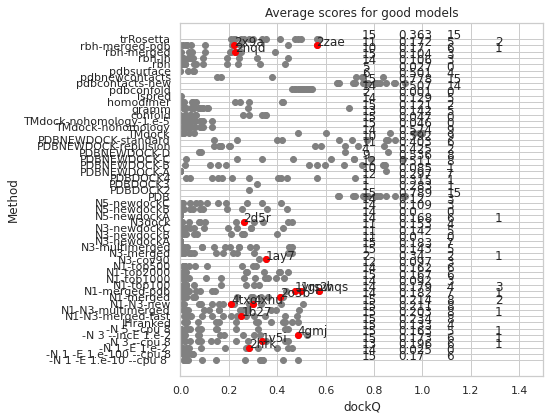

In [105]:
r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print (excludecolumns)
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [106]:
cutoff=0.1

In [107]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']

cutoff=0.1

In [108]:
goodmodels=df_max.loc[(df_max.dockQ>cutoff)&(df_max.params.isin(JHsets)) ]["CODE"].unique()

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


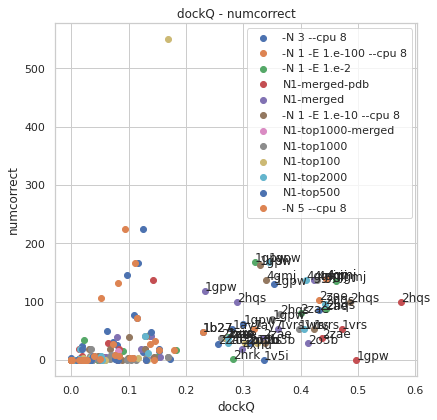

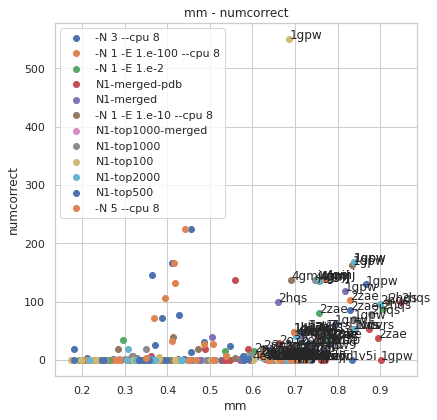

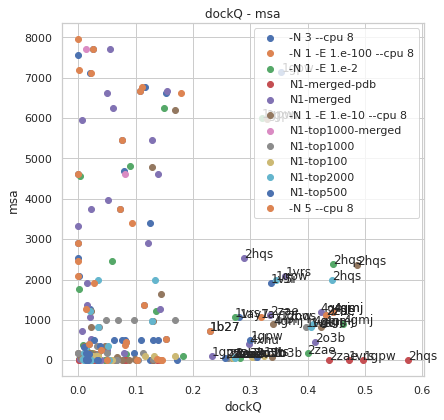

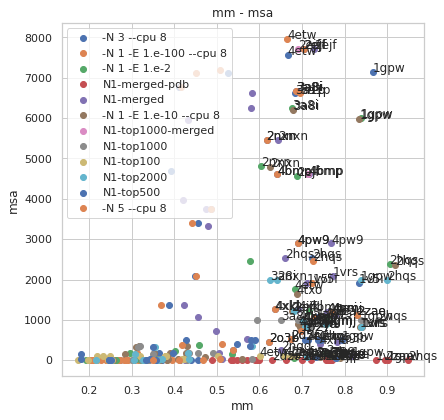

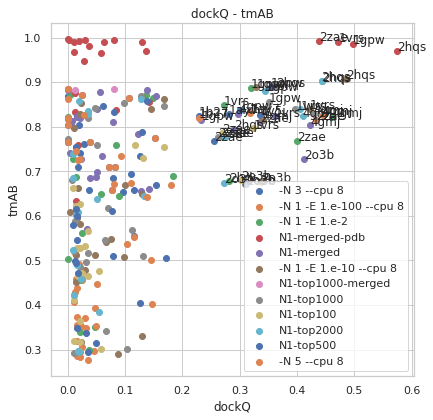

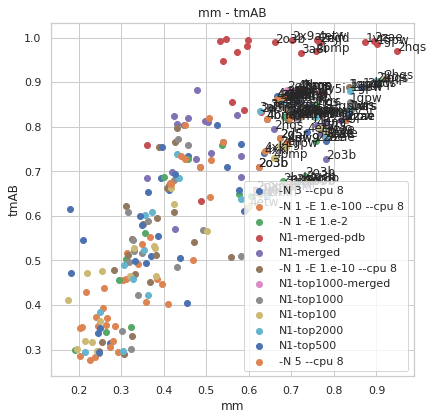

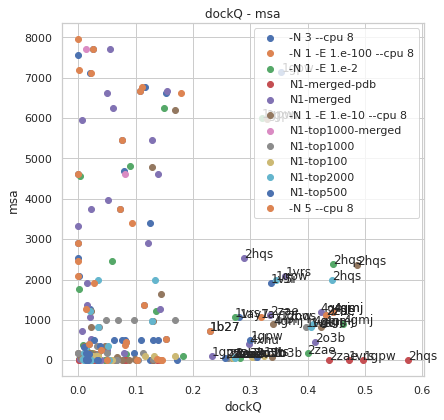

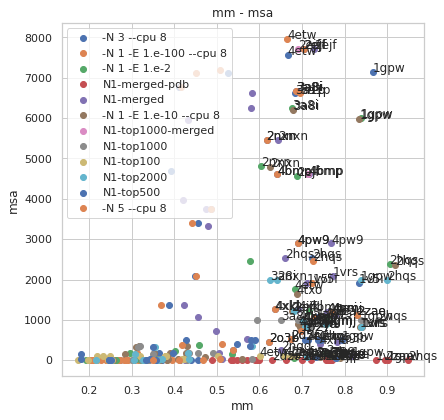

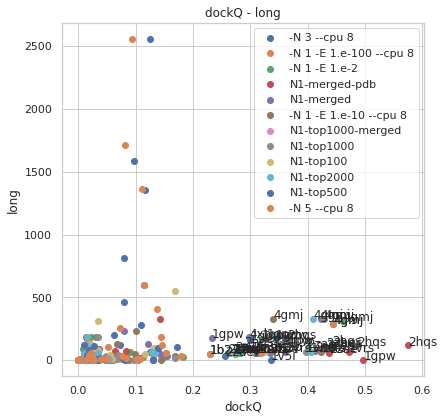

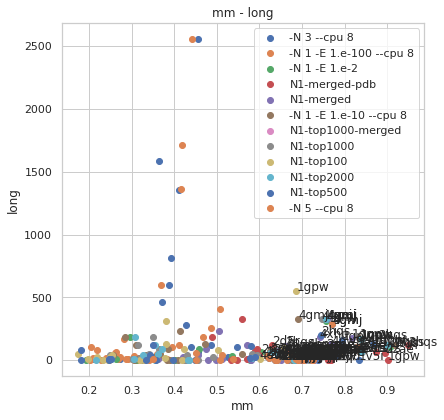

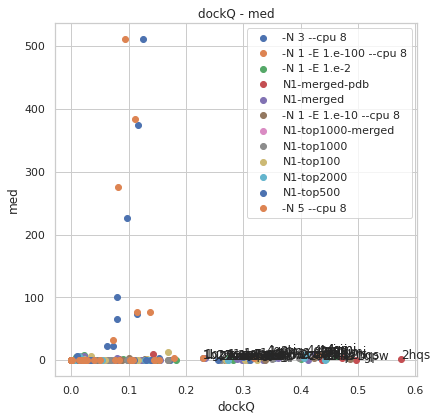

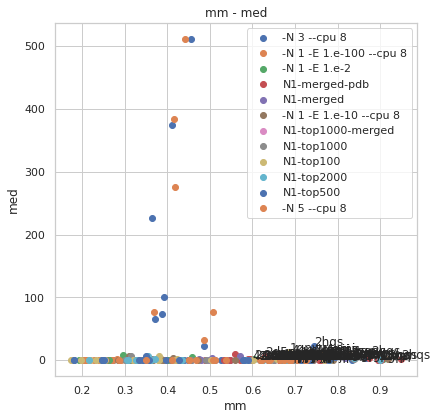

In [109]:
tempdf=df_max.loc[df_max.params.isin(JHsets)] 


tempdf=tempdf.loc[tempdf.CODE.isin(goodmodels)]
cf={"dockQ":0.2,"mm":0.6,"numcorrect":50}
for y in ["numcorrect","msa","tmAB","msa","long","med"]:
    for x in ["dockQ","mm","numcorrect"]:
        cutoff=cf[x]
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        for d in JHsets:
            xdata=tempdf.loc[tempdf.params==d][x]
            ydata=tempdf.loc[tempdf.params==d][y]
            plt.scatter(xdata,ydata,label=d)
            cc=np.corrcoef(xdata,ydata)
            for i, txt in enumerate(tempdf.loc[tempdf.params==d].name):
                sstr=txt[0:4]
                if (xdata[i]>cutoff):
                    ax.annotate(sstr, (xdata[i], ydata[i]))
        ax.set_title(x + " - " + y )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.legend()
    plt.close()

In [110]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov90', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'pdbnewcontacts', 'PDBNEWDOCK-A',
       'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-repulsion', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb',
       'rbh-merged', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB', 'JHranked'],
      dtype=object)

In [111]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '2hrk', '1ay7', '1b27', '1gcq',
       '1v5i', '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6',
       '5cra', '4pw9', '4xhu', '4xkl', '2nqd', '2ejf', '5bmu', '4etw'],
      dtype=object)

In [112]:
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
tempdf

name  lenA  lenB  msa  msaA  msaB  cdhit  \
JHparams    code                                                            
PDB         1ay7  1ay7_u2_A-1ay7_u1_A    97    97  0.0   0.0   0.0      0   
            1b27  1b27_u2_A-1b27_u1_A   109   109  0.0   0.0   0.0      0   
            1gpw  1gpw_u2_A-1gpw_u1_A   252   252  0.0   0.0   0.0      0   
            1v5i  1v5i_u2_A-1v5i_u1_A   276   276  0.0   0.0   0.0      0   
            1vrs  1vrs_u2_A-1vrs_u1_A   124   124  0.0   0.0   0.0      0   
...                               ...   ...   ...  ...   ...   ...    ...   
pdbcontacts 2o3b  2o3b_u2_A-2o3b_u1_A   240   240  0.0   0.0   0.0      0   
            2x9a  2x9a_u1_A-2x9a_u2_A   103    63  0.0   0.0   0.0      0   
            2zae  2zae_u1_A-2zae_u2_A   107    93  0.0   0.0   0.0      0   
            4gmj  4gmj_u2_A-4gmj_u1_A   253   253  0.0   0.0   0.0      0   
            4xhu  4xhu_u2_A-4xhu_u1_A   352   352  0.0   0.0   0.0      0   

                  dockQ   fnat     iRMS  ...  CODE       params      tmAB  \
JHparams    code                         ...                                
PDB         1ay7  0.929  0.861  172.569  ...  1ay7          PDB  0.998225   
            1b27  0.919  0.800  162.003  ...  1b27          PDB  0.996305   
            1gpw  0.771  0.733  428.467  ...  1gpw          PDB  0.983270   
            1v5i  0.653  0.660    2.501  ...  1v5i          PDB  0.962600   
            1vrs  0.850  0.714  177.286  ...  1vrs          PDB  0.981685   
...                 ...    ...      ...  ...   ...          ...       ...   
pdbcontacts 2o3b  0.529  0.722    5.381  ...  2o3b  pdbcontacts  0.875920   
            2x9a  0.692  0.750    0.814  ...  2x9a  pdbcontacts  0.911500   
            2zae  0.539  0.565    1.397  ...  2zae  pdbcontacts  0.860355   
            4gmj  0.604  0.659    2.149  ...  4gmj  pdbcontacts  0.938575   
            4xhu  0.467  0.519   10.946  ...  4xhu  pdbcontacts  0.873565   

                  msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  \
JHparams    code                                                                
PDB         1ay7    0.0   0.99846        0.0   0.99799        0.0         0.0   
            1b27    0.0   0.99634        0.0   0.99627        0.0         0.0   
            1gpw    0.0   0.98685        0.0   0.97969        0.0         0.0   
            1v5i    0.0   0.97830        0.0   0.94690        0.0         0.0   
            1vrs    0.0   0.99533        0.0   0.97768        0.0         0.0   
...                 ...       ...        ...       ...        ...         ...   
pdbcontacts 2o3b    0.0   0.93597        0.0   0.84982        0.0         0.0   
            2x9a    0.0   0.98016        0.0   0.84284        0.0         0.0   
            2zae    0.0   0.93809        0.0   0.78262        0.0         0.0   
            4gmj    0.0   0.96999        0.0   0.90716        0.0         0.0   
            4xhu    0.0   0.92326        0.0   0.85175        0.0         0.0   

                  len  
JHparams    code       
PDB         1ay7  187  
            1b27  199  
            1gpw  456  
            1v5i  354  
            1vrs  241  
...               ...  
pdbcontacts 2o3b  384  
            2x9a  166  
            2zae  200  
            4gmj  489  
            4xhu  447  

[76 rows x 54 columns]

In [113]:
df_max.loc[df_max.params=="N3-multimerged"]["dockQ"]

JHparams        code
N3-multimerged  1ay7    0.287
                1b27    0.242
                1bdj    0.050
                1buh    0.023
                1bvn    0.012
                        ...  
                4xs0    0.083
                4y5o    0.036
                4y7m    0.024
                4yeb    0.040
                4yoc    0.025
Name: dockQ, Length: 121, dtype: float64

-N 1 -E 1.e-2 
-N 3 --cpu 8
N1-N3-new


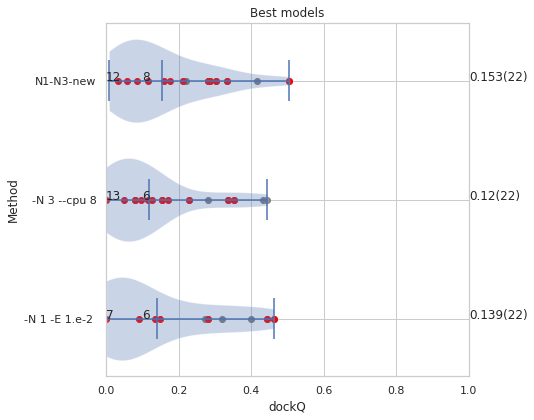

In [114]:
pdbset=['-N 3 --cpu 8', "-N 1 -E 1.e-2 " ,"N1-N3-new"]
cutoff=0.2
codes=goodmodels
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
#tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['CODE']).reset_index()
best_df.sort_values("params")

#good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
good_df=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))&(df_max.dockQ>cutoff )].reset_index()

plt.scatter(good_df.dockQ,good_df.params,color="grey")
plt.scatter(best_df.dockQ,best_df.params,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.params==best_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[best_df.params[i]]==0:
        done[best_df.params[i]]=1
        ax.annotate(str(numhit),(.0, best_df.params[i]))
        ax.annotate(str(round(average[best_df.params[i]],3))+"("+str(length[good_df.params[i]])+")"
                    ,(1.0, best_df.params[i]))
for d in pdbset:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.params[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[good_df.params[i]]==0:
        done[good_df.params[i]]=1
        ax.annotate(str(numhit),(.1, good_df.params[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))
plt.savefig("N1-N3-violin.png")


In [115]:
#data_dirst


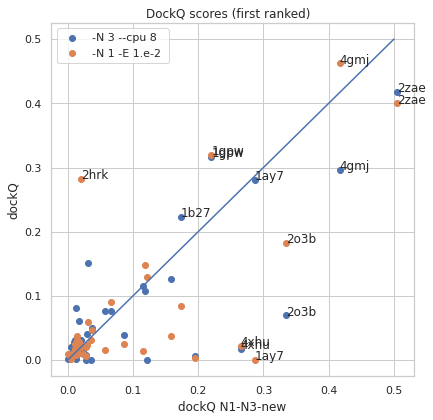

In [116]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
baseset="N1-N3-new"
for d in pdbset:
  
    if d==baseset:continue   
    #print (d)
    df_merged = pd.merge(data_first[baseset],data_first[d], on=['CODE'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.5]
y=[0,0.5]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+baseset)
ax.set_ylabel("dockQ")
plt.savefig("N1-N3-scatter.png")
#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ')

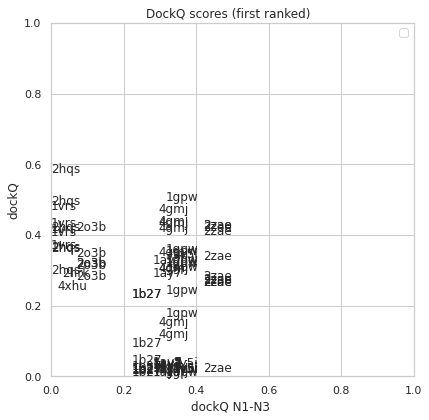

In [117]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in JHsets:
  
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
#x=[0,0.3]
#y=[0,0.3]
#plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ N1-N3 ")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [118]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '2hrk', '1ay7', '1b27', '1gcq',
       '1v5i', '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6',
       '5cra', '4pw9', '4xhu', '4xkl', '2nqd', '2ejf', '5bmu', '4etw'],
      dtype=object)

In [119]:
JHsets

['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ',
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [120]:
JHsets1=['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ']

In [121]:
JHsets2=[
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [122]:
JHsets=['-N 3 --cpu 8',
 '-N 1 -E 1.e-2 --cpu 8',
 '-N 1 -E 1.e-10 --cpu 8 ',
 '-N 5 --cpu 8']
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()


In [123]:
train_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
test_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()

In [124]:
good_df=df_first.loc[(df_first.code.isin(goodmodels)&(df_first.JHparams.isin(JHsets)))].reset_index()

In [125]:
good_df=df_first.loc[(df_first.JHparams.isin(JHsets))].reset_index()

In [126]:
good_df

index                 name      JHparams lenA lenB   msa    msaA    msaB  \
0        0  1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1        2  1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
2        4  1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651  349880   23051   
3        6  1buh_u1_A-1buh_u2_A  -N 3 --cpu 8  291   72  1177  555226    1820   
4        8  1bvn_u1_A-1bvn_u2_A  -N 3 --cpu 8  496   75    95   52623     123   
..     ...                  ...           ...  ...  ...   ...     ...     ...   
658   6883  4zfr_u1_A-4zfr_u2_A  -N 5 --cpu 8  186   77  1358   14421   42037   
659   6885  5brr_u1_A-5brr_u2_A  -N 5 --cpu 8  378  266   611   13523   45636   
660   6887  5cec_u1_A-5cec_u2_A  -N 5 --cpu 8  403  191  1594   33067  312612   
661   6889  5cra_u1_A-5cra_u2_A  -N 5 --cpu 8  193   77     1      11   42026   
662   6891  5eg3_u1_A-5eg3_u2_A  -N 5 --cpu 8  303  105   499  560629   26558   

    cdhit  dockQ  ...  CODE        params      tmAB     msaAB tmAB_max  \
0    1026  0.281  ...  1ay7  -N 3 --cpu 8  0.828190    1759.5  0.84625   
1     654  0.223  ...  1b27  -N 3 --cpu 8  0.824750    1759.0  0.85428   
2    5071      0  ...  1bdj  -N 3 --cpu 8  0.861435  186465.5  0.92240   
3     548      0  ...  1buh  -N 3 --cpu 8  0.560760  278523.0  0.73259   
4      85  0.006  ...  1bvn  -N 3 --cpu 8  0.619740   26373.0  0.70905   
..    ...    ...  ...   ...           ...       ...       ...      ...   
658   490      0  ...  4zfr  -N 5 --cpu 8  0.796765   28229.0  0.83034   
659   550   0.02  ...  5brr  -N 5 --cpu 8  0.790865   29579.5  0.80934   
660  1577      0  ...  5cec  -N 5 --cpu 8  0.628690  172839.5  0.85640   
661     1  0.008  ...  5cra  -N 5 --cpu 8  0.536735   21018.5  0.71605   
662   278      0  ...  5eg3  -N 5 --cpu 8  0.733390  293593.5  0.77821   

    msaAB_max tmAB_min msaAB_min numcorrect  len  
0      2034.0  0.81013    1485.0     53.985  187  
1      2034.0  0.79522    1484.0     49.025  199  
2    349880.0  0.80047   23051.0          0  247  
3    555226.0  0.38893    1820.0          0  363  
4     52623.0  0.53043     123.0          0  571  
..        ...      ...       ...        ...  ...  
658   42037.0  0.76319   14421.0          0  263  
659   45636.0  0.77239   13523.0          2  644  
660  312612.0  0.40098   33067.0          0  594  
661   42026.0  0.35742      11.0          0  270  
662  560629.0  0.68857   26558.0          0  408  

[663 rows x 57 columns]

In [127]:
cutoff

0.2

AttributeError: 'float' object has no attribute 'shape'

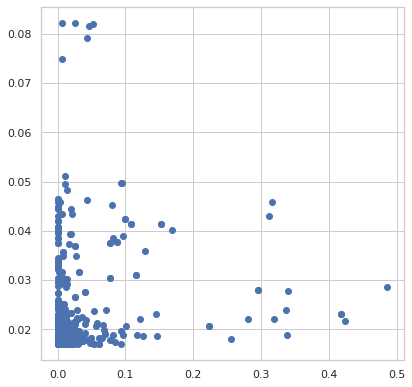

AttributeError: 'float' object has no attribute 'shape'

In [128]:
ydata=good_df.dockQ
cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]

#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]


reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [129]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 0.016969638029803315
Coefficients: 
 [-9.60801561e-05  2.72022894e-05  3.62283721e-06]


In [130]:

for s in JHsets:
    set_df=good_df.loc[good_df.params==s]
    ypred=set_df["dockQ"].to_list()
    (i,j,dockq,mm)=get_ranks(set_df,ypred)
    print (s,i,j,dockq,mm)

-N 3 --cpu 8 6 6 0.0 0.0
-N 1 -E 1.e-2 --cpu 8 0 0 0 0


-N 1 -E 1.e-10 --cpu 8  6 6 0.0 0.0


-N 5 --cpu 8 4 4 0.0 0.0


AttributeError: 'float' object has no attribute 'shape'

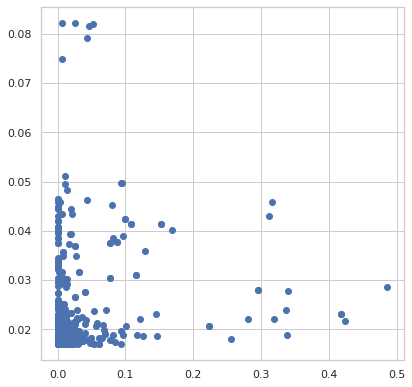

AttributeError: 'float' object has no attribute 'shape'

In [131]:
xdata=good_df[cols]
ydata=good_df.dockQ

ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


In [132]:
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()
good_df

index                 name      JHparams lenA lenB   msa    msaA    msaB  \
0       0  1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1       2  1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
2      30  1gcq_u1_A-1gcq_u2_A  -N 3 --cpu 8   66   57  1365   77497   77704   
3      34  1gpw_u1_A-1gpw_u2_A  -N 3 --cpu 8  252  204  7137   58466   67629   
4      88  1v5i_u1_A-1v5i_u2_A  -N 3 --cpu 8  276   78  1922   54177   12066   
..    ...                  ...           ...  ...  ...   ...     ...     ...   
90   6857  4txo_u1_A-4txo_u2_A  -N 5 --cpu 8  178  158  7106  131653  115265   
91   6867  4xhu_u1_A-4xhu_u2_A  -N 5 --cpu 8  352   95   410    9970     548   
92   6869  4xkl_u1_A-4xkl_u2_A  -N 5 --cpu 8   76   34  1262   41752  442180   
93   6873  4xs0_u1_A-4xs0_u2_A  -N 5 --cpu 8  147  141  3395    9453    9375   
94   6889  5cra_u1_A-5cra_u2_A  -N 5 --cpu 8  193   77     1      11   42026   

   cdhit  dockQ  ...  CODE        params      tmAB     msaAB tmAB_max  \
0   1026  0.281  ...  1ay7  -N 3 --cpu 8  0.828190    1759.5  0.84625   
1    654  0.223  ...  1b27  -N 3 --cpu 8  0.824750    1759.0  0.85428   
2    765  0.115  ...  1gcq  -N 3 --cpu 8  0.539990   77600.5  0.63426   
3   5348  0.316  ...  1gpw  -N 3 --cpu 8  0.885175   63047.5  0.89229   
4   1642  0.336  ...  1v5i  -N 3 --cpu 8  0.818890   33121.5  0.88557   
..   ...    ...  ...   ...           ...       ...       ...      ...   
90  6529  0.022  ...  4txo  -N 5 --cpu 8  0.725480  123459.0  0.74765   
91   240  0.018  ...  4xhu  -N 5 --cpu 8  0.678145    5259.0  0.73972   
92   355  0.014  ...  4xkl  -N 5 --cpu 8  0.740180  241966.0  0.88845   
93  2649  0.094  ...  4xs0  -N 5 --cpu 8  0.732555    9414.0  0.74440   
94     1  0.008  ...  5cra  -N 5 --cpu 8  0.536735   21018.5  0.71605   

   msaAB_max tmAB_min msaAB_min numcorrect  len  
0     2034.0  0.81013    1485.0     53.985  187  
1     2034.0  0.79522    1484.0     49.025  199  
2    77704.0  0.44572   77497.0      71.76  123  
3    67629.0  0.87806   58466.0     96.033  456  
4    54177.0  0.75221   12066.0          1  354  
..       ...      ...       ...        ...  ...  
90  131653.0  0.70331  115265.0          1  336  
91    9970.0  0.61657     548.0          0  447  
92  442180.0  0.59191   41752.0          0  110  
93    9453.0  0.72071    9375.0    224.928  288  
94   42026.0  0.35742      11.0          0  270  

[95 rows x 57 columns]

In [133]:
# Now we try all combinations - no plots
set1_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
set2_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()

cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
ydata=good_df.dockQ

res={}
maxvalue=0
for c in cols:
    xdata=good_df[[c]]
    reg.fit(xdata,ydata)
    ypred = reg.predict(xdata)
    print (c,round(np.corrcoef(ydata,ypred)[0,1],3))
    res[c]=np.corrcoef(ydata,ypred)[0,1]
    maxvalue=max(res[c],maxvalue)    
for c in cols:
    for d in cols:
        xdata=good_df[[c,d]]
        reg.fit(xdata,ydata)
        ypred = reg.predict(xdata)
        #print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        res[c+d]=np.corrcoef(ydata,ypred)[0,1]
        #if (res[c+d]-maxvalue>0.0):
        #    print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        (i,j,k,l)=get_ranks(good_df,ypred)
        print (c,d,i,j,k,l)

AttributeError: 'float' object has no attribute 'shape'

In [134]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 0.12038781286983144
Coefficients: 
 [-0.00012085]


Text(0, 0.5, 'predicted dockQ')

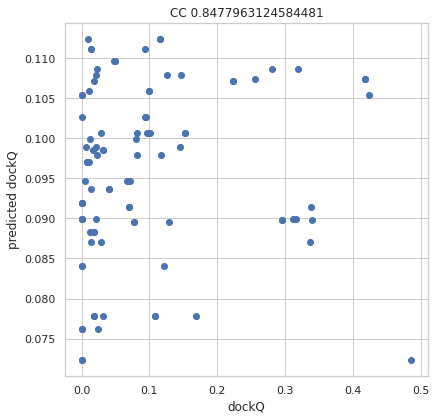

In [135]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
#cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


In [136]:
newdf=df.loc[df.JHparams=="trRosetta"]
plt.scatter(newdf.csv,newdf.)

SyntaxError: invalid syntax (<ipython-input-136-1bbe5c8e123e>, line 2)

In [137]:
newdf[["CODE","dockQ","csv","tmAB","long"]].sort_values("csv")

KeyError: "['csv'] not in index"

In [138]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']


Text(0.5, 0, 'cdhit')

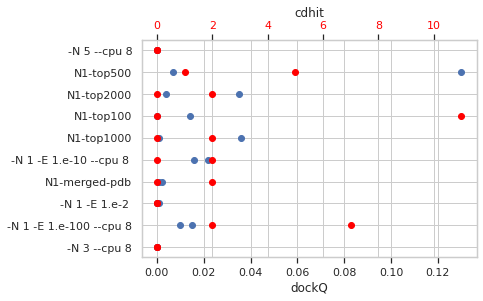

In [139]:
newdf=df.loc[(df.CODE=="4etw")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

Text(0.5, 0, 'cdhit')

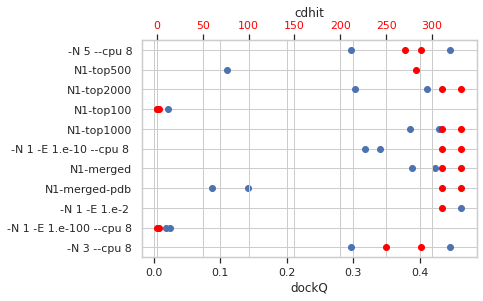

In [140]:
newdf=df.loc[(df.CODE=="4gmj")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

# bes models to test 2zae 4gmj
# Bad model 4etw

In [141]:
df_max.loc[(df_max.params=="trRosetta") & (df_max.dockQ==0)]

name  lenA  lenB     msa      msaA      msaB  \
JHparams  code                                                                
trRosetta 1uad  1uad_u2_A-1uad_u1_A   163   163  2378.0  316984.0  316984.0   
          3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0   35975.0   35975.0   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   359.0   55937.0   55937.0   
          4emj  4emj_u2_A-4emj_u1_A   403   403  6589.0  354953.0  354953.0   

                cdhit  dockQ  fnat     iRMS  ...  CODE     params      tmAB  \
JHparams  code                               ...                              
trRosetta 1uad   1729    0.0   0.0  297.154  ...  1uad  trRosetta  0.751370   
          3fap    573    0.0   0.0  187.525  ...  3fap  trRosetta  0.840125   
          3rj3    247    0.0   0.0  515.213  ...  3rj3  trRosetta  0.635370   
          4emj   5681    0.0   0.0  687.538  ...  4emj  trRosetta  0.884110   

                   msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams  code                                                       
trRosetta 1uad  170578.5   0.82646   316984.0   0.71369    24173.0   
          3fap   18731.0   0.87845    35975.0   0.80207     1489.0   
          3rj3   39722.5   0.80210    55937.0   0.48427    23508.0   
          4emj  195361.5   0.90839   354953.0   0.86736    35929.0   

                numcorrect  len  
JHparams  code                   
trRosetta 1uad         0.0  259  
          3fap         0.0  201  
          3rj3         0.0  421  
          4emj         0.0  509  

[4 rows x 54 columns]

<ipython-input-142-6f81a7848140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["logEvalue"]=np.log10(df_test.evalue.astype('float64')).clip(+10,-10)
<ipython-input-142-6f81a7848140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["logHHEvalue"]=np.log10(df_test.hhevalue.astype('float64')).clip(+10,-10)


69 223
0       0.4
2       1.8
4         0
6       1.6
8         0
       ... 
436    99.9
438     0.5
440     0.3
442       1
444     0.7
Name: hhprob, Length: 223, dtype: object
0           0
2          50
4           0
6          30
8       31.25
        ...  
436    27.723
438    53.846
440    33.333
442         0
444        40
Name: seqid, Length: 223, dtype: object
0      3.999957
2      0.633468
4      3.999957
6     -0.070581
8      0.361728
         ...   
436   -8.206210
438   -0.318759
440    1.278754
442    3.999957
444    1.832509
Name: logEvalue, Length: 223, dtype: float64
0      0.281
2      0.223
4          0
6          0
8      0.006
       ...  
436     0.08
438    0.012
440        0
442    0.008
444        0
Name: dockQ, Length: 223, dtype: object


TypeError: No loop matching the specified signature and casting was found for ufunc add

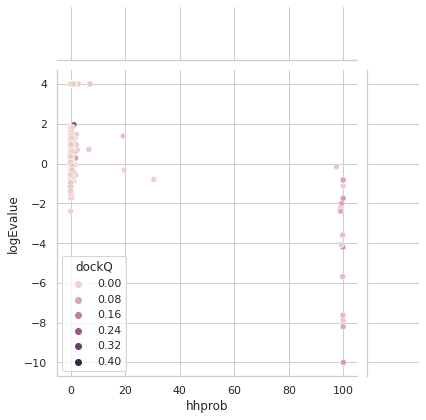

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [142]:
df_test= data_first["-N 3 --cpu 8"]
df_test["logEvalue"]=np.log10(df_test.evalue.astype('float64')).clip(+10,-10)
df_test["logHHEvalue"]=np.log10(df_test.hhevalue.astype('float64')).clip(+10,-10)
#plt.scatter(df_test.tmB,df_test.tmA)
cutoff=0.5
num=len(df_test.loc[df_test.hhprob>cutoff])
tot=len(df_test)


print (num,tot)
print (df_test.hhprob)
print (df_test.seqid)
print (df_test.logEvalue)
print (df_test.dockQ)

sns_plot = sns.jointplot(data=df_test, x="hhprob", y="logEvalue") # ,hue="dockQ")
#sns_plot.title("Homologous pairs: "+str(num)+" of "+str(tot))
sns_plot.savefig("hhpred-logEvalue.png")





TypeError: No loop matching the specified signature and casting was found for ufunc add

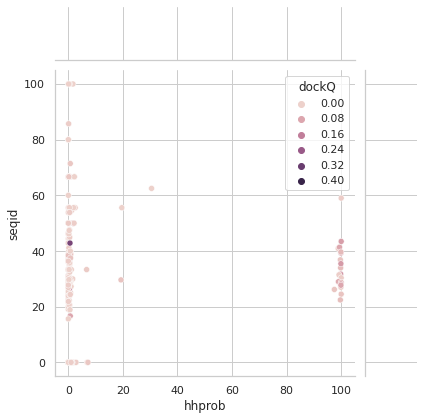

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [149]:
sns_plot = sns.jointplot(data=df_test, x="hhprob", y="seqid") # ,hue="dockQ")
#sns_plot = sns.displot(data=df_test, x="hhprob", y="seqid" ,hue="dockQ")
#.set_title("Homologous pairs: "+str(num)+" of "+str(tot))
sns_plot.savefig("hhpred-seqid.png")


<ipython-input-150-9e92fcd9557c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Long"]=(df_test.long.astype('float64')).clip(0,10000)
/home/arnee/.local/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-150-9e92fcd9557c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["LogLong"]=np.log10(df_test.long.astype('float64')).clip(0,2.5)


TypeError: No loop matching the specified signature and casting was found for ufunc add

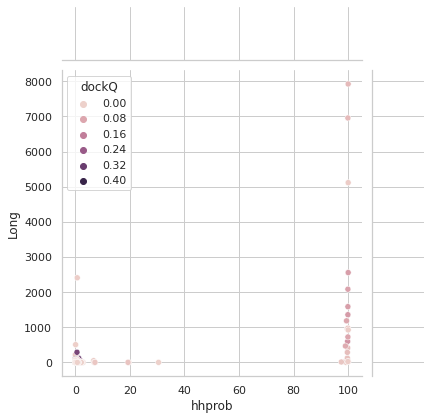

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [150]:
df_test["Long"]=(df_test.long.astype('float64')).clip(0,10000)
df_test["LogLong"]=np.log10(df_test.long.astype('float64')).clip(0,2.5)
sns_plot = sns.jointplot(data=df_test, x="hhprob", y="Long"  ,hue="dockQ")
sns_plot.savefig("hhpred-long.png")
